<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="../reference/GZ_logo.png" width="60" align="right">
    </a>
    <h1>
        One-Stop Analytics: Predictive Modeling
    </h1>
</div>


# Case Study of Autism Spectrum Disorder (ASD) with R

---

<img src="../reference/CDC_ASD/CDC_ASD_01.jpg" align="left">

<img src="../reference/CDC_ASD/CDC_ASD_02.png" width="700" align="center">


## <span style="color:blue">[ United States ]</span> 

## Centers for Disease Control and Prevention (CDC) - Autism Spectrum Disorder (ASD)

Autism spectrum disorder (ASD) is a developmental disability that can cause significant social, communication and behavioral challenges. CDC is committed to continuing to provide essential data on ASD, search for factors that put children at risk for ASD and possible causes, and develop resources that help identify children with ASD as early as possible.

https://www.cdc.gov/ncbddd/autism/data/index.html


## <span style="color:blue">[ Singapore ]</span> 

## TODAY Online - More preschoolers diagnosed with developmental issues

Doctors cited better awareness among parents and preschool teachers, leading to early referrals for diagnosis.

https://www.gov.sg/news/content/today-online-more-preschoolers-diagnosed-with-developmental-issues

<img src="../reference/SG_ASD/SG_ASD_01.png" width="650" align="left">



<img src="../reference/SG_ASD/SG_ASD_04.png" align="left"> 

https://www.pathlight.org.sg/

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="60" align="right">
    </a>
</div>


# Workshop Objective: 

## Use R to predict Autism Spectrum Disorder (ASD) prevalence. 

https://www.cdc.gov/ncbddd/autism/data/index.html

* ## Linear Model: Simple Linear Regression (SLR)

* ## Linear Model: Multiple Linear Regression (MLR)

* ## Linear Model: Polynomial Regression (PLR)

* ## Linear Model: Logistic Regression (LR)

* ## Linear Model: Model Evaluation: Train/Test, K-Fold Cross Validation, Confusion Matrix

* ## Non-Linear Model: Decision Tree (DT)

* ## Non-Linear Model: Neural Network (NN)

* ## Non-Linear Model: Random Forest (RF)

* ## Non-Linear Model: Support Vector Machines (SVM)

* ## Non-Linear Model: Adaptive Boosting (AdaBoost)

* ## Workshop Submission

* ## Appendices

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



In [ ]:
library("repr") # Show graphs in-line notebook

**Obtain current R <span style="color:blue">working directory</span>**

In [ ]:
getwd()

**Set new R working directory**

In [ ]:
# setwd("/media/sf_vm_shared_folder/git/DDC/DDC-ASD/model_R")
# setwd('~/Desktop/admin-desktop/vm_shared_folder/git/DDC-ASD/model_R')
getwd()

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Linear Model: Simple Linear Regression (SLR)</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Linear Model: Simple Linear Regression (SLR) - Workshop Task
    </h3>
</div>


**Workshop Task:**

1. a.	Graph the data in a scatterplot to determine if there is a possible linear relationship.

2. b.	Compute and interpret the linear correlation coefficient, r.

3. c.	Determine the regression equation for the data.

4. d.	Graph the regression equation and the data points.

5. e.	Identify potential influential observations (outliers).

6. f.	At the 5% significance level, do the data provide sufficient evidence to conclude that the slope of the population regression line is not 0 and, hence, that [ Year ] is useful as a predictor of ASD [ Prevalence ]?

7. g.	Obtain the residuals and create a residual plot. Decide whether it is reasonable to consider that the assumptions for regression analysis are met by the variables in questions.

8. h.	Compute and interpret the coefficient of determination, $R^2$.

9. i.	Find the predicted ASD Prevalence of future Year.

10. j.	Determine a 95% confidence interval for the predicted ASD Prevalence.


**Use Case Data: <span style="color:blue">"../dataset/ADV_ASD_State_R.csv"</span>**

**Read in CSV data, storing as R <span style="color:blue">dataframe</span>**

In [ ]:
# Read back in above saved file:
ASD_State <- read.csv("../dataset/ADV_ASD_State_R.csv")
ASD_State$Year_Factor <- factor(ASD_State$Year_Factor, ordered = TRUE) # Convert Year_Factor to ordered.factor
ASD_State$Prevalence_Risk2 = factor(ASD_State$Prevalence_Risk2, ordered=TRUE, levels=c("Low", "High"))
ASD_State$Prevalence_Risk4 = factor(ASD_State$Prevalence_Risk4, ordered=TRUE, levels=c("Low", "Medium", "High", "Very High"))


In [ ]:
head(ASD_State)

In [ ]:
# Filter [ Source: ADDM ], including only two clomuns for SLR:
# Dependent variable: Prevalence
# independent variable: Year
ASD_State_4_SLR = subset(ASD_State, Source_UC == 'ADDM', select = c(Prevalence, Year))
#
dim(ASD_State_4_SLR)
ASD_State_4_SLR

---

**SLR Workshop Task: <span style="color:blue">1. a. Graph the data in a scatterplot to determine if there is a possible linear relationship.</span>**

In [ ]:
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=4)

In [ ]:
plot(ASD_State_4_SLR$Year, ASD_State_4_SLR$Prevalence)

---

**SLR Workshop Task: <span style="color:blue">2. b. Compute and interpret the linear correlation coefficient, r.</span>**

Compute correlaion coefficient

In [ ]:
cor(ASD_State_4_SLR$Year, ASD_State_4_SLR$Prevalence)

Apply correlation test (two tail: != 0)

In [ ]:
cor.test(ASD_State_4_SLR$Year, ASD_State_4_SLR$Prevalence)

Apply correlation test (one tail: > 0)

In [ ]:
cor.test(ASD_State_4_SLR$Year, ASD_State_4_SLR$Prevalence, alternative = "greater")

---

**SLR Workshop Task: <span style="color:blue">3. c. Determine the regression equation for the data.</span>**

In [ ]:
fit_model = lm(formula = Prevalence ~ Year, data = ASD_State_4_SLR)
print(fit_model)

---

**SLR Workshop Task: <span style="color:blue">4. d. Graph the regression equation and the data points.</span>**

In [ ]:
plot(ASD_State_4_SLR$Year, ASD_State_4_SLR$Prevalence)
abline(fit_model, col="blue", lwd=2)

---

**SLR Workshop Task: <span style="color:blue">5. e. Identify potential influential observations (outliers).</span>**

In [ ]:
# library(repr)
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=6)
par(mfrow=c(2, 2)) 
plot(fit_model)
par(mfrow=c(1, 1))

**<span style="color:blue">[ Tips ]</span> We notice:**

* Based on **Residual vs Leverage** chart, there seems no potential influential observations (outliers)


---

**SLR Workshop Task: <span style="color:blue">6. f. At the 5% significance level, do the data provide sufficient evidence to conclude that the slope of the population regression line is not 0 and, hence, that [ Year ] is useful as a predictor of ASD [ Prevalence ]?</span>**

In [ ]:
summary(fit_model)

**<span style="color:blue">[ Tips ]</span> We notice:**

2. F-test's p-value is 4.13e-15, which is smaller than 0.05, thus above 95% confidence.

---

**SLR Workshop Task: <span style="color:blue">7. g.	Obtain the residuals and create a residual plot. Decide whether it is reasonable to consider that the assumptions for regression analysis are met by the variables in questions.</span>**

In [ ]:
# library(repr)
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=6)
par(mfrow=c(2, 2)) 
plot(fit_model)
par(mfrow=c(1, 1))

**<span style="color:blue">[ Tips ]</span> We notice:**

* Based on **Residual vs Fitted, Sacle-Location, and Normal Q-Q** charts, the residuals (vs fitted) are following linear assumption, with slightly "fan-shape" at larger Year values (Heteroscedasticity). https://statisticsbyjim.com/regression/heteroscedasticity-regression/

* We are to explore polynomial regression method for this issue later.

---

**SLR Workshop Task: <span style="color:blue">8. h.	Compute and interpret the coefficient of determination, $R^2$.</span>**

In [ ]:
summary(fit_model)

**<span style="color:blue">[ Tips ]</span> We notice:**

* $R^2$ is  0.5219

* Adjusted $R^2$ is  0.5162

---

**SLR Workshop Task: <span style="color:blue">9. i.	Find the predicted ASD Prevalence of future Year.</span>**

In [ ]:
future_year = 2025
newdata = data.frame(Year = future_year) 
predict(fit_model,newdata)
#
cat("Predicted ASD Prevalence of Year [", future_year, "] is", round(predict(fit_model,newdata), 1), "per 1,000 Children")


---

**SLR Workshop Task: <span style="color:blue">10. j.	Determine a 95% confidence interval for the predicted ASD Prevalence.</span>**

In [ ]:
predict(fit_model, newdata, interval = "predict")

In [ ]:
cat("\nPredicted ASD Prevalence of Year [", future_year, "] (95% Upper CI) is", 
    round(predict(fit_model,newdata, interval = "predict")[3], 1), "per 1,000 Children")

cat("\nPredicted ASD Prevalence of Year [", future_year, "] (95% Lower CI) is", 
    round(predict(fit_model,newdata, interval = "predict")[2], 1), "per 1,000 Children")


---

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h3>
        Quiz:
    </h3>
    <p>
        Create Prevalence ~ Year SLR model for Data Source: SPED
    </p>
</div>

In [ ]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# Write your code below and press Shift+Enter to execute 
ASD_State_4_SLR = subset(ASD_State, Source_UC == 'SPED', select = c(Prevalence, Year))
ASD_State_4_SLR = subset(ASD_State, Source_UC == 'NSCH', select = c(Prevalence, Year))
ASD_State_4_SLR = subset(ASD_State, Source_UC == 'MEDI', select = c(Prevalence, Year))
ASD_State_4_SLR = subset(ASD_State, select = c(Prevalence, Year))

-->

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Linear Model: Multiple Linear Regression (MLR)</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Linear Model: Multiple Linear Regression (MLR) - Workshop Task
    </h3>
</div>


**Workshop Task:**

1. a.	Get the data.

2. b.	Discover and visualize the data to gain insights (Is there missing Value in the dataframe, then how to deal with the missing value)

3. c.	Visualize Data and trends

4. d.	Compute correlation between variables and apply multiple regression.

5. e.	Check multicollinearity, then how to remove multicollinearity.

6. f.	How is your ﬁnal model looks like?


**MLR Workshop Task: <span style="color:blue">1. a. Get the data.</span>**

**Use Case Data: <span style="color:blue">"../dataset/ADV_ASD_State_R.csv"</span>**

**Read in CSV data, storing as R <span style="color:blue">dataframe</span>**

In [27]:
# Read back in above saved file:
# ASD_State <- read.csv("../dataset/ADV_ASD_State_R.csv")
# ASD_State$Year_Factor <- factor(ASD_State$Year_Factor, ordered = TRUE) # Convert Year_Factor to ordered.factor
# ASD_State$Prevalence_Risk2 = factor(ASD_State$Prevalence_Risk2, ordered=TRUE, levels=c("Low", "High"))
# ASD_State$Prevalence_Risk4 = factor(ASD_State$Prevalence_Risk4, ordered=TRUE, levels=c("Low", "Medium", "High", "Very High"))


In [28]:
head(ASD_State)

State,Denominator,Prevalence,Lower.CI,Upper.CI,Year,Source,Source_Full1,State_Full1,State_Full2,...,Hispanic.Lower.CI,Hispanic.Upper.CI,Asian.or.Pacific.Islander.Prevalence,Asian.or.Pacific.Islander.Lower.CI,Asian.or.Pacific.Islander.Upper.CI,Source_UC,Source_Full3,Prevalence_Risk2,Prevalence_Risk4,Year_Factor
AZ,45322,6.5,5.8,7.3,2000,addm,Autism & Developmental Disabilities Monitoring Network,Arizona,AZ-Arizona,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
GA,43593,6.5,5.8,7.3,2000,addm,Autism & Developmental Disabilities Monitoring Network,Georgia,GA-Georgia,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
MD,21532,5.5,4.6,6.6,2000,addm,Autism & Developmental Disabilities Monitoring Network,Maryland,MD-Maryland,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
NJ,29714,9.9,8.9,11.1,2000,addm,Autism & Developmental Disabilities Monitoring Network,New Jersey,NJ-New Jersey,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
SC,24535,6.3,5.4,7.4,2000,addm,Autism & Developmental Disabilities Monitoring Network,South Carolina,SC-South Carolina,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
WV,23065,4.5,3.7,5.5,2000,addm,Autism & Developmental Disabilities Monitoring Network,West Virginia,WV-West Virginia,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,Low,Low,2000


In [29]:
names(ASD_State)

[1] "State"                               
 [2] "Denominator"                         
 [3] "Prevalence"                          
 [4] "Lower.CI"                            
 [5] "Upper.CI"                            
 [6] "Year"                                
 [7] "Source"                              
 [8] "Source_Full1"                        
 [9] "State_Full1"                         
[10] "State_Full2"                         
[11] "Numerator_ASD"                       
[12] "Numerator_NonASD"                    
[13] "Proportion"                          
[14] "Chi_Wilson_Corrected_Lower.CI"       
[15] "Chi_Wilson_Corrected_Upper.CI"       
[16] "Male.Prevalence"                     
[17] "Male.Lower.CI"                       
[18] "Male.Upper.CI"                       
[19] "Female.Prevalence"                   
[20] "Female.Lower.CI"                     
[21] "Female.Upper.CI"                     
[22] "Non.hispanic.white.Prevalence"       
[23] "Non.hispanic.white.Lower.CI"         
[24] "Non.hispanic.white.Upper.CI"         
[25] "Non.hispanic.black.Prevalence"       
[26] "Non.hispanic.black.Lower.CI"         
[27] "Non.hispanic.black.Upper.CI"         
[28] "Hispanic.Prevalence"                 
[29] "Hispanic.Lower.CI"                   
[30] "Hispanic.Upper.CI"                   
[31] "Asian.or.Pacific.Islander.Prevalence"
[32] "Asian.or.Pacific.Islander.Lower.CI"  
[33] "Asian.or.Pacific.Islander.Upper.CI"  
[34] "Source_UC"                           
[35] "Source_Full3"                        
[36] "Prevalence_Risk2"                    
[37] "Prevalence_Risk4"                    
[38] "Year_Factor"

In [30]:
# Filter to include relevant clomuns for MLR:
# Dependent variable: Prevalence
# independent variable: Let's include all at the moment
ASD_State_4_MLR = ASD_State
#
dim(ASD_State_4_MLR)
ASD_State_4_MLR

[1] 1692   38

State,Denominator,Prevalence,Lower.CI,Upper.CI,Year,Source,Source_Full1,State_Full1,State_Full2,...,Hispanic.Lower.CI,Hispanic.Upper.CI,Asian.or.Pacific.Islander.Prevalence,Asian.or.Pacific.Islander.Lower.CI,Asian.or.Pacific.Islander.Upper.CI,Source_UC,Source_Full3,Prevalence_Risk2,Prevalence_Risk4,Year_Factor
AZ,45322,6.5,5.8,7.3,2000,addm,Autism & Developmental Disabilities Monitoring Network,Arizona,AZ-Arizona,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
GA,43593,6.5,5.8,7.3,2000,addm,Autism & Developmental Disabilities Monitoring Network,Georgia,GA-Georgia,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
MD,21532,5.5,4.6,6.6,2000,addm,Autism & Developmental Disabilities Monitoring Network,Maryland,MD-Maryland,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
NJ,29714,9.9,8.9,11.1,2000,addm,Autism & Developmental Disabilities Monitoring Network,New Jersey,NJ-New Jersey,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
SC,24535,6.3,5.4,7.4,2000,addm,Autism & Developmental Disabilities Monitoring Network,South Carolina,SC-South Carolina,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
WV,23065,4.5,3.7,5.5,2000,addm,Autism & Developmental Disabilities Monitoring Network,West Virginia,WV-West Virginia,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,Low,Low,2000
AL,35472,3.3,2.7,3.9,2002,addm,Autism & Developmental Disabilities Monitoring Network,Alabama,AL-Alabama,...,0.5,7.7,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,Low,Low,2002
AZ,45113,6.2,5.5,7.0,2002,addm,Autism & Developmental Disabilities Monitoring Network,Arizona,AZ-Arizona,...,2.6,4.5,2.6,0.8,8.0,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2002
AR,36472,6.9,6.1,7.8,2002,addm,Autism & Developmental Disabilities Monitoring Network,Arkansas,AR-Arkansas,...,1.3,6.4,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2002
CO,11020,5.9,4.6,7.5,2002,addm,Autism & Developmental Disabilities Monitoring Network,Colorado,CO-Colorado,...,0.7,5.3,6.3,2.0,19.6,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2002


---

**MLR Workshop Task: <span style="color:blue">2. b.	Discover and visualize the data to gain insights (Is there missing Value in the dataframe, then how to deal with the missing value).</span>**

In [31]:
summary(ASD_State_4_MLR)

     State       Denominator        Prevalence        Lower.CI    
 AZ     :  40   Min.   :    965   Min.   : 0.400   Min.   : 0.30  
 MD     :  40   1st Qu.: 107151   1st Qu.: 3.100   1st Qu.: 2.80  
 GA     :  39   Median : 353328   Median : 5.600   Median : 5.30  
 MO     :  39   Mean   : 604689   Mean   : 7.191   Mean   : 6.42  
 NC     :  39   3rd Qu.: 767928   3rd Qu.: 9.200   3rd Qu.: 8.60  
 WI     :  39   Max.   :5824922   Max.   :42.700   Max.   :29.90  
 (Other):1456                                                     
    Upper.CI           Year       Source   
 Min.   : 0.600   Min.   :2000   addm: 86  
 1st Qu.: 3.300   1st Qu.:2003   medi:655  
 Median : 5.900   Median :2007   nsch: 98  
 Mean   : 8.262   Mean   :2007   sped:853  
 3rd Qu.: 9.700   3rd Qu.:2011             
 Max.   :69.000   Max.   :2016             
                                           
                                                 Source_Full1
 Autism & Developmental Disabilities Monitoring Ne

$State
[1] 0

$Denominator
[1] 0

$Prevalence
[1] 0

$Lower.CI
[1] 0

$Upper.CI
[1] 0

$Year
[1] 0

$Source
[1] 0

$Source_Full1
[1] 0

$State_Full1
[1] 0

$State_Full2
[1] 0

$Numerator_ASD
[1] 0

$Numerator_NonASD
[1] 0

$Proportion
[1] 0

$Chi_Wilson_Corrected_Lower.CI
[1] 0

$Chi_Wilson_Corrected_Upper.CI
[1] 0

$Male.Prevalence
[1] 1606

$Male.Lower.CI
[1] 1606

$Male.Upper.CI
[1] 1606

$Female.Prevalence
[1] 1606

$Female.Lower.CI
[1] 1606

$Female.Upper.CI
[1] 1606

$Non.hispanic.white.Prevalence
[1] 1606

$Non.hispanic.white.Lower.CI
[1] 1606

$Non.hispanic.white.Upper.CI
[1] 1606

$Non.hispanic.black.Prevalence
[1] 1607

$Non.hispanic.black.Lower.CI
[1] 1607

$Non.hispanic.black.Upper.CI
[1] 1607

$Hispanic.Prevalence
[1] 1615

$Hispanic.Lower.CI
[1] 1615

$Hispanic.Upper.CI
[1] 1615

$Asian.or.Pacific.Islander.Prevalence
[1] 1624

$Asian.or.Pacific.Islander.Lower.CI
[1] 1624

$Asian.or.Pacific.Islander.Upper.CI
[1] 1624

$Source_UC
[1] 0

$Source_Full3
[1] 0

$Prevalence_Risk2
[1] 0

$Prevalence_Risk4
[1] 0

$Year_Factor
[1] 0

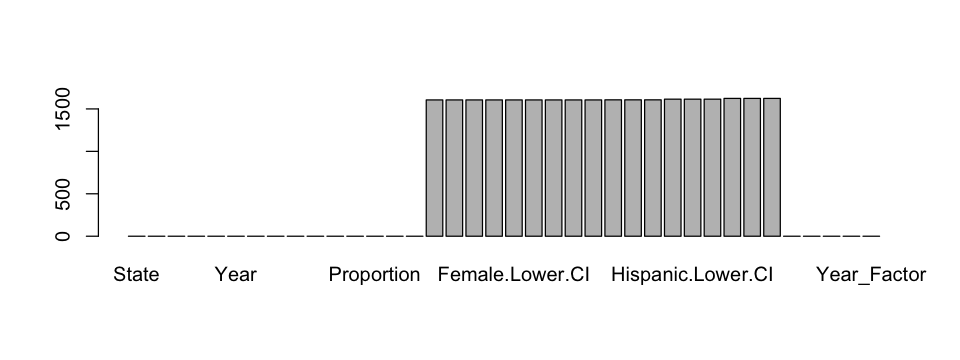

In [32]:
# Check whether each columns got missing value:
lapply(ASD_State_4_MLR, function(col_x)sum(is.na(col_x)))
       
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=3)
barplot(apply(ASD_State_4_MLR, 2, function(col_x)sum(is.na(col_x))))

In [33]:
dim(ASD_State_4_MLR)

[1] 1692   38

In [34]:
#Get all the column variables which contains missing value 
NA_Column_Names <- names(ASD_State_4_MLR[0, colSums(is.na(ASD_State_4_MLR)) > 0])
#
NA_Column_Names

[1] "Male.Prevalence"                     
 [2] "Male.Lower.CI"                       
 [3] "Male.Upper.CI"                       
 [4] "Female.Prevalence"                   
 [5] "Female.Lower.CI"                     
 [6] "Female.Upper.CI"                     
 [7] "Non.hispanic.white.Prevalence"       
 [8] "Non.hispanic.white.Lower.CI"         
 [9] "Non.hispanic.white.Upper.CI"         
[10] "Non.hispanic.black.Prevalence"       
[11] "Non.hispanic.black.Lower.CI"         
[12] "Non.hispanic.black.Upper.CI"         
[13] "Hispanic.Prevalence"                 
[14] "Hispanic.Lower.CI"                   
[15] "Hispanic.Upper.CI"                   
[16] "Asian.or.Pacific.Islander.Prevalence"
[17] "Asian.or.Pacific.Islander.Lower.CI"  
[18] "Asian.or.Pacific.Islander.Upper.CI"

In [35]:
# Remove these columns from dataframe
ASD_State_4_MLR <- ASD_State_4_MLR[ , !(names(ASD_State_4_MLR) %in% NA_Column_Names)]
#
ASD_State_4_MLR

State,Denominator,Prevalence,Lower.CI,Upper.CI,Year,Source,Source_Full1,State_Full1,State_Full2,Numerator_ASD,Numerator_NonASD,Proportion,Chi_Wilson_Corrected_Lower.CI,Chi_Wilson_Corrected_Upper.CI,Source_UC,Source_Full3,Prevalence_Risk2,Prevalence_Risk4,Year_Factor
AZ,45322,6.5,5.8,7.3,2000,addm,Autism & Developmental Disabilities Monitoring Network,Arizona,AZ-Arizona,295,45027,0.006508980,5.798905,7.303948,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
GA,43593,6.5,5.8,7.3,2000,addm,Autism & Developmental Disabilities Monitoring Network,Georgia,GA-Georgia,283,43310,0.006491868,5.769431,7.302595,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
MD,21532,5.5,4.6,6.6,2000,addm,Autism & Developmental Disabilities Monitoring Network,Maryland,MD-Maryland,118,21414,0.005480215,4.557351,6.583638,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
NJ,29714,9.9,8.9,11.1,2000,addm,Autism & Developmental Disabilities Monitoring Network,New Jersey,NJ-New Jersey,294,29420,0.009894326,8.814705,11.102544,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
SC,24535,6.3,5.4,7.4,2000,addm,Autism & Developmental Disabilities Monitoring Network,South Carolina,SC-South Carolina,155,24380,0.006317506,5.381662,7.411085,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
WV,23065,4.5,3.7,5.5,2000,addm,Autism & Developmental Disabilities Monitoring Network,West Virginia,WV-West Virginia,104,22961,0.004508996,3.703408,5.483723,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,Low,Low,2000
AL,35472,3.3,2.7,3.9,2002,addm,Autism & Developmental Disabilities Monitoring Network,Alabama,AL-Alabama,117,35355,0.003298376,2.740271,3.966581,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,Low,Low,2002
AZ,45113,6.2,5.5,7.0,2002,addm,Autism & Developmental Disabilities Monitoring Network,Arizona,AZ-Arizona,280,44833,0.006206637,5.512327,6.986318,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2002
AR,36472,6.9,6.1,7.8,2002,addm,Autism & Developmental Disabilities Monitoring Network,Arkansas,AR-Arkansas,252,36220,0.006909410,6.096803,7.827549,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2002
CO,11020,5.9,4.6,7.5,2002,addm,Autism & Developmental Disabilities Monitoring Network,Colorado,CO-Colorado,65,10955,0.005898367,4.590861,7.561078,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2002


**No missing values, as they have been handled earlier. <span style="color:blue">Hurrah!</span>**

**But some varialbe contains <span style="color:blue">"leaky"</span> information, which can be used to directly calculate the dependent variable: Prevalence. This won't happen in real world scenario, thus they need to be removed.**

In [36]:
cbind(names(ASD_State_4_MLR), c(1:length(names(ASD_State_4_MLR))))

State,1
Denominator,2
Prevalence,3
Lower.CI,4
Upper.CI,5
Year,6
Source,7
Source_Full1,8
State_Full1,9
State_Full2,10
Numerator_ASD,11


In [37]:
Leaky_Column_Names = c('Lower.CI', 'Upper.CI', 'Numerator_ASD', 'Numerator_NonASD', 'Proportion', 
                       'Chi_Wilson_Corrected_Lower.CI', 'Chi_Wilson_Corrected_Upper.CI', 
                       'Prevalence_Risk2', 'Prevalence_Risk4')

In [38]:
# Remove these columns from dataframe
ASD_State_4_MLR <- ASD_State_4_MLR[ , !(names(ASD_State_4_MLR) %in% Leaky_Column_Names)]
#
ASD_State_4_MLR

State,Denominator,Prevalence,Year,Source,Source_Full1,State_Full1,State_Full2,Source_UC,Source_Full3,Year_Factor
AZ,45322,6.5,2000,addm,Autism & Developmental Disabilities Monitoring Network,Arizona,AZ-Arizona,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,2000
GA,43593,6.5,2000,addm,Autism & Developmental Disabilities Monitoring Network,Georgia,GA-Georgia,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,2000
MD,21532,5.5,2000,addm,Autism & Developmental Disabilities Monitoring Network,Maryland,MD-Maryland,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,2000
NJ,29714,9.9,2000,addm,Autism & Developmental Disabilities Monitoring Network,New Jersey,NJ-New Jersey,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,2000
SC,24535,6.3,2000,addm,Autism & Developmental Disabilities Monitoring Network,South Carolina,SC-South Carolina,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,2000
WV,23065,4.5,2000,addm,Autism & Developmental Disabilities Monitoring Network,West Virginia,WV-West Virginia,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,2000
AL,35472,3.3,2002,addm,Autism & Developmental Disabilities Monitoring Network,Alabama,AL-Alabama,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,2002
AZ,45113,6.2,2002,addm,Autism & Developmental Disabilities Monitoring Network,Arizona,AZ-Arizona,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,2002
AR,36472,6.9,2002,addm,Autism & Developmental Disabilities Monitoring Network,Arkansas,AR-Arkansas,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,2002
CO,11020,5.9,2002,addm,Autism & Developmental Disabilities Monitoring Network,Colorado,CO-Colorado,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,2002


**Remove redundant/duplicate variables (aliased coefficients), retaining one for each type of information is enough:**

https://en.wikipedia.org/wiki/Multicollinearity

https://stats.stackexchange.com/questions/112442/what-are-aliased-coefficients

In [39]:
Redundant_Column_Names = c('State', 'Source_Full1', 'State_Full1', 'Source_UC', 'Source_Full3', 'Year_Factor')

In [40]:
# Remove these columns from dataframe
ASD_State_4_MLR <- ASD_State_4_MLR[ , !(names(ASD_State_4_MLR) %in% Redundant_Column_Names)]
#
ASD_State_4_MLR

Denominator,Prevalence,Year,Source,State_Full2
45322,6.5,2000,addm,AZ-Arizona
43593,6.5,2000,addm,GA-Georgia
21532,5.5,2000,addm,MD-Maryland
29714,9.9,2000,addm,NJ-New Jersey
24535,6.3,2000,addm,SC-South Carolina
23065,4.5,2000,addm,WV-West Virginia
35472,3.3,2002,addm,AL-Alabama
45113,6.2,2002,addm,AZ-Arizona
36472,6.9,2002,addm,AR-Arkansas
11020,5.9,2002,addm,CO-Colorado


---

**MLR Workshop Task: <span style="color:blue">3. c.	Visualize the data to gain insights</span>**

In [41]:
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=4)

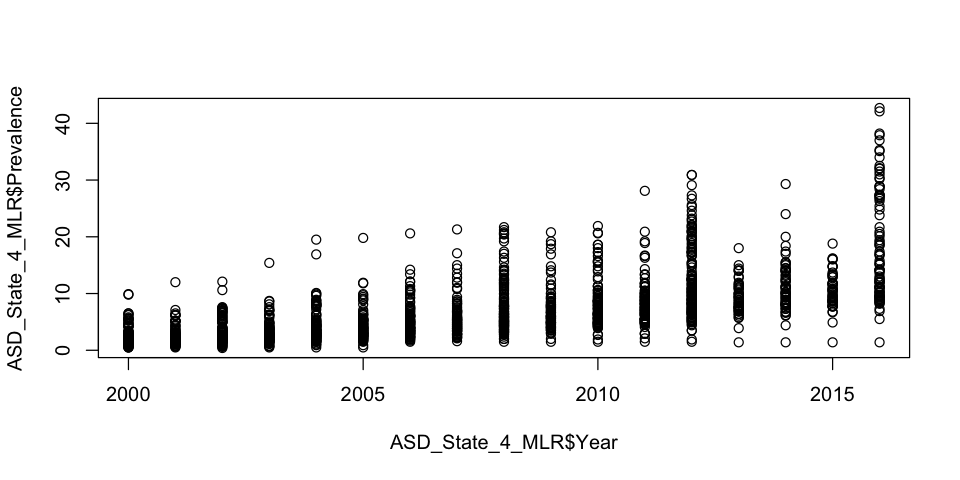

In [42]:
plot(ASD_State_4_MLR$Year, ASD_State_4_MLR$Prevalence)

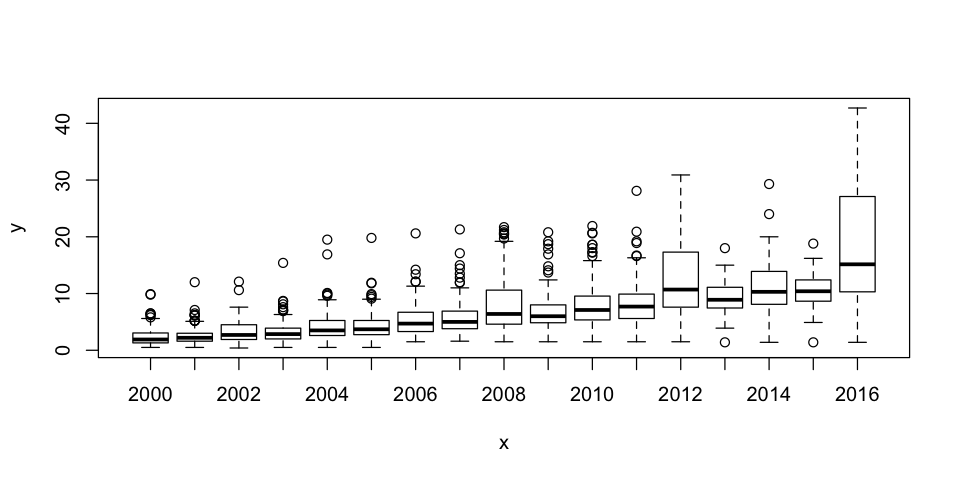

In [43]:
plot(as.factor(ASD_State_4_MLR$Year), ASD_State_4_MLR$Prevalence)

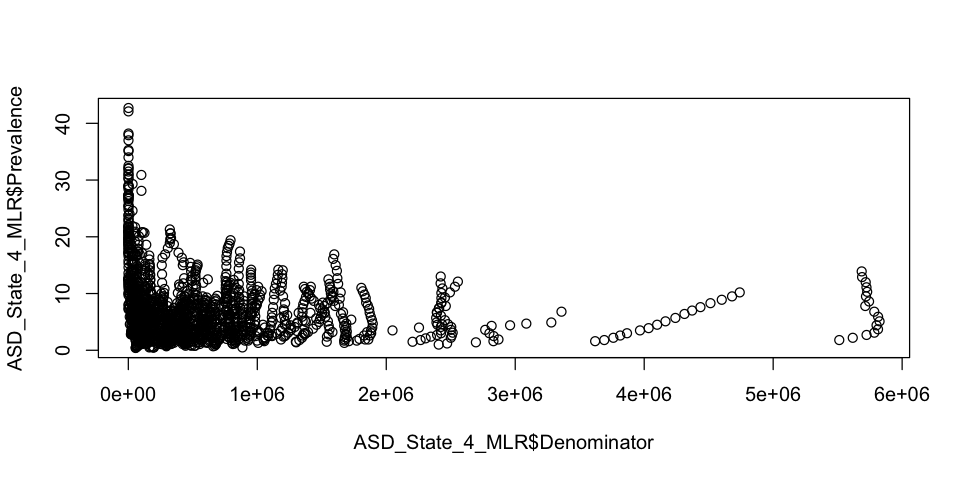

In [44]:
plot(ASD_State_4_MLR$Denominator, ASD_State_4_MLR$Prevalence)

Loading required package: OneR


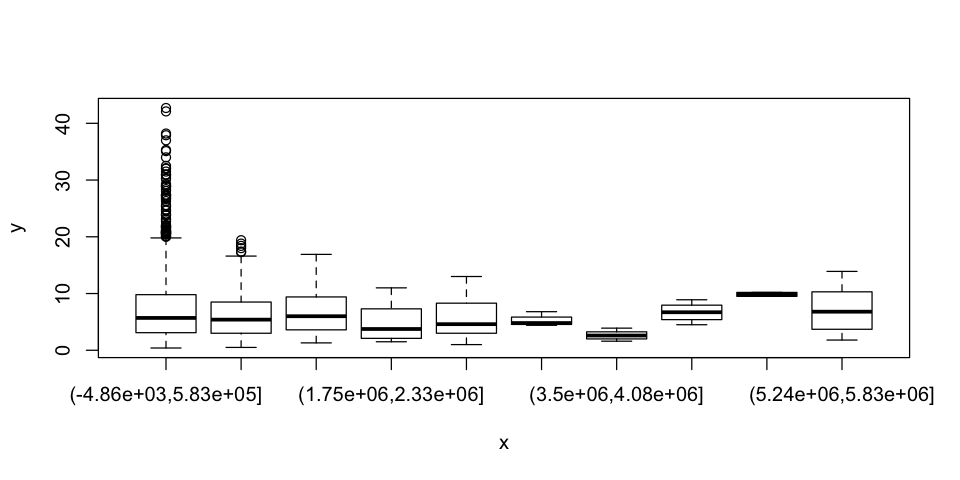

In [45]:
# To use bin() function
# https://www.rdocumentation.org/packages/OneR/versions/2.2/topics/bin
if(!require(OneR)){install.packages("OneR")}
library('OneR')

# Bin 'Denominator'
plot(bin(ASD_State_4_MLR$Denominator, nbins = 10), ASD_State_4_MLR$Prevalence)

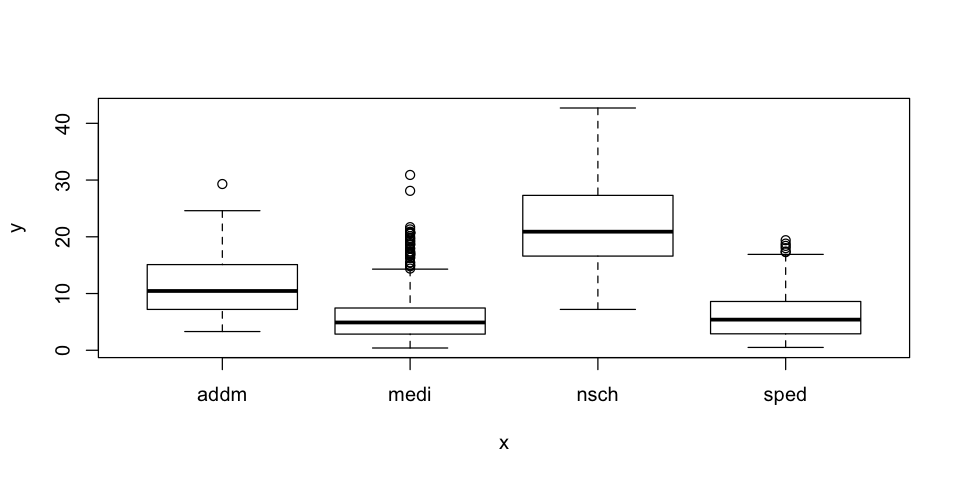

In [46]:
plot(ASD_State_4_MLR$Source, ASD_State_4_MLR$Prevalence)

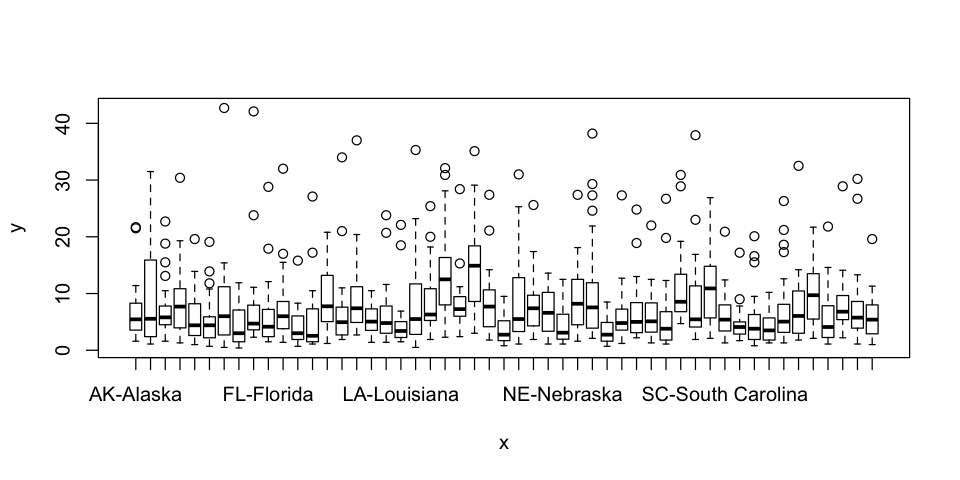

In [47]:
plot(ASD_State_4_MLR$State_Full2, ASD_State_4_MLR$Prevalence)

---

**MLR Workshop Task: <span style="color:blue">4. d.	Compute correlation between variables and apply multiple regression.</span>**

Recode categorical variable to dummy (numeric) variable using one-hot encoding:

In [48]:
# To use select_if() function
if(!require(dplyr)){install.packages("dplyr")}
library("dplyr")

summary(select_if(ASD_State_4_MLR, is.numeric))

  Denominator        Prevalence          Year     
 Min.   :    965   Min.   : 0.400   Min.   :2000  
 1st Qu.: 107151   1st Qu.: 3.100   1st Qu.:2003  
 Median : 353328   Median : 5.600   Median :2007  
 Mean   : 604689   Mean   : 7.191   Mean   :2007  
 3rd Qu.: 767928   3rd Qu.: 9.200   3rd Qu.:2011  
 Max.   :5824922   Max.   :42.700   Max.   :2016  

In [49]:
correlation = cor(select_if(ASD_State_4_MLR, is.numeric))
correlation

,Denominator,Prevalence,Year
Denominator,1.00000000,-0.1374662,0.02851671
Prevalence,-0.13746621,1.0000000,0.64002950
Year,0.02851671,0.6400295,1.00000000


In [50]:
# Variable's correlation against target dependent variable:
correlation[, 2]

Denominator  Prevalence        Year 
 -0.1374662   1.0000000   0.6400295

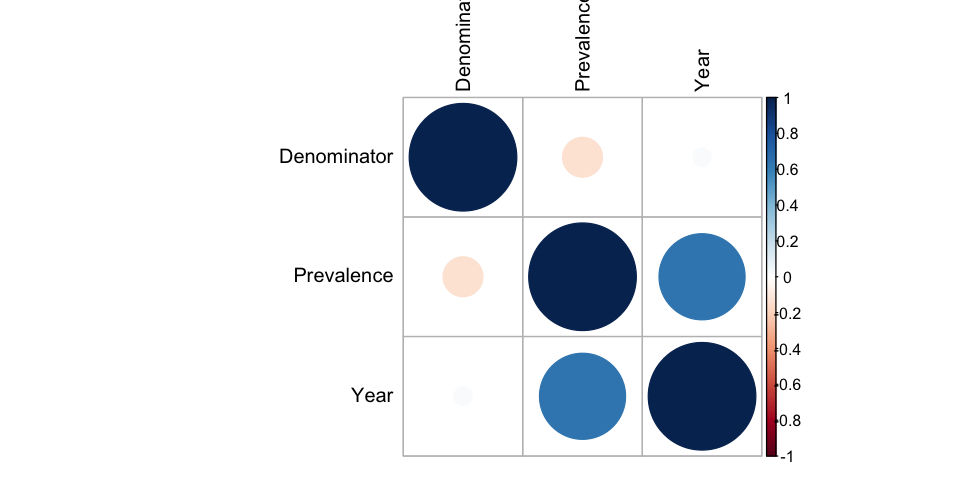

In [57]:
if(!require(corrplot)){install.packages("corrplot")}
library("corrplot")
corrplot(correlation, tl.col="black", tl.pos = "lt")

In [58]:
str(ASD_State_4_MLR)

'data.frame':	1692 obs. of  5 variables:
 $ Denominator: int  45322 43593 21532 29714 24535 23065 35472 45113 36472 11020 ...
 $ Prevalence : num  6.5 6.5 5.5 9.9 6.3 4.5 3.3 6.2 6.9 5.9 ...
 $ Year       : int  2000 2000 2000 2000 2000 2000 2002 2002 2002 2002 ...
 $ Source     : Factor w/ 4 levels "addm","medi",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ State_Full2: Factor w/ 51 levels "AK-Alaska","AL-Alabama",..: 4 11 21 32 41 50 2 4 3 6 ...


In [59]:
# To build (National level) ASD Prevalence predictive model for all state's:
# In situations that we won't know the US. State name, we can also fit a model without State name/code:
fit_model = lm(Prevalence ~ . - State_Full2, data = ASD_State_4_MLR) # Exclude a variable using: "- variable"
#
summary(fit_model)


Call:
lm(formula = Prevalence ~ . - State_Full2, data = ASD_State_4_MLR)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4476  -1.9332  -0.2786   1.2479  21.0130 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.310e+03  3.819e+01 -34.306   <2e-16 ***
Denominator -1.139e-07  1.057e-07  -1.078    0.281    
Year         6.583e-01  1.902e-02  34.606   <2e-16 ***
Sourcemedi  -4.550e+00  3.964e-01 -11.478   <2e-16 ***
Sourcensch   6.699e+00  5.171e-01  12.956   <2e-16 ***
Sourcesped  -5.611e+00  3.984e-01 -14.085   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.43 on 1686 degrees of freedom
Multiple R-squared:  0.6585,	Adjusted R-squared:  0.6575 
F-statistic: 650.2 on 5 and 1686 DF,  p-value: < 2.2e-16


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.6575
    </p>
</div>


In [60]:
# To build (US. State level) ASD Prevalence predictive model for specific state's prevalence:
# In situations that we shall know the US. State name. (A state name is required during prediciton.)
fit_model = lm(Prevalence ~ . , data = ASD_State_4_MLR) # "~." means all other variables, including factors
#
summary(fit_model)


Call:
lm(formula = Prevalence ~ ., data = ASD_State_4_MLR)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.3326  -1.3626  -0.0689   1.2558  19.0273 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -1.305e+03  3.144e+01 -41.498  < 2e-16 ***
Denominator                         1.152e-06  2.252e-07   5.115 3.50e-07 ***
Year                                6.558e-01  1.566e-02  41.889  < 2e-16 ***
Sourcemedi                         -4.997e+00  3.557e-01 -14.048  < 2e-16 ***
Sourcensch                          6.100e+00  4.404e-01  13.853  < 2e-16 ***
Sourcesped                         -6.699e+00  3.915e-01 -17.110  < 2e-16 ***
State_Full2AL-Alabama               1.377e+00  6.917e-01   1.990 0.046725 *  
State_Full2AR-Arkansas             -8.466e-01  6.838e-01  -1.238 0.215831    
State_Full2AZ-Arizona               1.592e-01  6.841e-01   0.233 0.816057    
State_Full2CA-California           -5.092

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.7697
    </p>
</div>


---

**MLR Workshop Task: <span style="color:blue">5. e.	Check multicollinearity, then how to remove multicollinearity.</span>**

< Detection of multicollinearity >

Some authors have suggested a formal detection-tolerance or the variance inflation factor (VIF) for multicollinearity. <span style="color:blue">A VIF of 5 or 10 and above</span> indicates a multicollinearity problem.

In [61]:
# To use select_if() function
if(!require(car)){install.packages("car")}
library("car")

Loading required package: car
Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



In [62]:
vif(fit_model)

,GVIF,Df,GVIF^(1/(2*Df))
Denominator,7.737921,1,2.781712
Year,1.146987,1,1.070975
Source,2.502245,3,1.165167
State_Full2,7.768262,50,1.020712


**<span style="color:blue">[ Tips ]</span> We notice VIF of Denominator and State_Full2 are high.** Let's exclude them one at a time.

**Retain: State; Remove: Denominator then re-build model:**

In [ ]:
# To build (National level) ASD Prevalence predictive model for all state's:
# In situations that we won't know the US. State name, we can also fit a model without State name/code:
fit_model_with_State = lm(Prevalence ~ . - Denominator, data = ASD_State_4_MLR) # Exclude a variable using: "- variable"
#
summary(fit_model_with_State)

In [ ]:
vif(fit_model_with_State)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.7662
    </p>
</div>


---

**Retain: Denominator; Remove: State; then re-build model:**

In [ ]:
# To build (National level) ASD Prevalence predictive model for all state's:
# In situations that we won't know the US. State name, we can also fit a model without State name/code:
fit_model_with_Denominator = lm(Prevalence ~ . - State_Full2, data = ASD_State_4_MLR) # Exclude a variable using: "- variable"
#
summary(fit_model_with_Denominator)

In [ ]:
vif(fit_model_with_Denominator)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.6575
    </p>
</div>


---

**MLR Workshop Task: <span style="color:blue">6. f.	How is your ﬁnal model looks like?</span>**

* During prediction, if US. State name will be known, then the **fit_model_with_State** can be better because it has higher $R^2$ value.


* During prediction, if US. State name will NOT be known,  then the **fit_model_with_Denominator** can be adopted because it doesn't require state name as input for prediciton.


**MLR Prediciton 1**

Let's use **fit_model_with_State** to predict CA-California ASD Prevalence of Year 2016 if ADDM would have conducted a survey

In [ ]:
newdata = ASD_State_4_MLR[1,] # Copy datastructure
newdata$Prevalence = NA
newdata$Denominator = 50000
newdata$Year = 2016
newdata$Source = "addm"
#newdata$State_Full2 = "CA-California"
newdata$State_Full2 = "AZ-Arizona"

newdata

In [ ]:
predict(fit_model_with_State, newdata, interval = "predict")
#
cat("Predicted ASD Prevalence is", round(predict(fit_model_with_State, newdata), 1), "per 1,000 Children")

**MLR Prediciton 2**

Let's use **fit_model_with_Denominator** to predict National level ASD Prevalence of Year 2016 if ADDM would have conducted a survey

In [ ]:
predict(fit_model_with_Denominator, newdata, interval = "predict")
#
cat("Predicted ASD Prevalence is", round(predict(fit_model_with_Denominator, newdata), 1), "per 1,000 Children")

**MLR Prediciton 2**

Let's use **fit_model** to predict FL-Florida State level ASD Prevalence of Year 2025 if SPED will conduct a record review/survey of 2,600,000 children.

In [ ]:
newdata = ASD_State_4_MLR[1,] # Copy datastructure
newdata$Prevalence = NA
newdata$Denominator = 2600000
newdata$Year = 2025
newdata$Source = "sped"
newdata$State_Full2 = "FL-Florida"

newdata

In [ ]:
predict(fit_model, newdata, interval = "predict")
#
cat("Predicted ASD Prevalence is", round(predict(fit_model, newdata), 1), "per 1,000 Children")

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Linear Model: Polynomial (Linear) Regression (PLR)</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Linear Model: Polynomial (Linear) Regression (PLR) - Workshop Task
    </h3>
</div>


**Workshop Task:**

1. a.	Get the data.

2. b.	Discover and visualize the data to gain insights (Is there missing Value in the dataframe, then how to deal with the missing value)

3. c.	Visualize Data and trends

4. d.	Compute correlation between variables and apply multiple regression.

5. e.	Multiple polynomial regression.


**PLR Workshop Task: <span style="color:blue">1. a. Get the data.</span>**

**Use Case Data: <span style="color:blue">"../dataset/ADV_ASD_State_R.csv"</span>**

**Read in CSV data, storing as R <span style="color:blue">dataframe</span>**

In [2]:
# Read back in above saved file:
ASD_State <- read.csv("../dataset/ADV_ASD_State_R.csv")
ASD_State$Year_Factor <- factor(ASD_State$Year_Factor, ordered = TRUE) # Convert Year_Factor to ordered.factor
ASD_State$Prevalence_Risk2 = factor(ASD_State$Prevalence_Risk2, ordered=TRUE, levels=c("Low", "High"))
ASD_State$Prevalence_Risk4 = factor(ASD_State$Prevalence_Risk4, ordered=TRUE, levels=c("Low", "Medium", "High", "Very High"))


In [3]:
head(ASD_State)

State,Denominator,Prevalence,Lower.CI,Upper.CI,Year,Source,Source_Full1,State_Full1,State_Full2,...,Hispanic.Lower.CI,Hispanic.Upper.CI,Asian.or.Pacific.Islander.Prevalence,Asian.or.Pacific.Islander.Lower.CI,Asian.or.Pacific.Islander.Upper.CI,Source_UC,Source_Full3,Prevalence_Risk2,Prevalence_Risk4,Year_Factor
AZ,45322,6.5,5.8,7.3,2000,addm,Autism & Developmental Disabilities Monitoring Network,Arizona,AZ-Arizona,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
GA,43593,6.5,5.8,7.3,2000,addm,Autism & Developmental Disabilities Monitoring Network,Georgia,GA-Georgia,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
MD,21532,5.5,4.6,6.6,2000,addm,Autism & Developmental Disabilities Monitoring Network,Maryland,MD-Maryland,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
NJ,29714,9.9,8.9,11.1,2000,addm,Autism & Developmental Disabilities Monitoring Network,New Jersey,NJ-New Jersey,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
SC,24535,6.3,5.4,7.4,2000,addm,Autism & Developmental Disabilities Monitoring Network,South Carolina,SC-South Carolina,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
WV,23065,4.5,3.7,5.5,2000,addm,Autism & Developmental Disabilities Monitoring Network,West Virginia,WV-West Virginia,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,Low,Low,2000


In [4]:
names(ASD_State)

[1] "State"                               
 [2] "Denominator"                         
 [3] "Prevalence"                          
 [4] "Lower.CI"                            
 [5] "Upper.CI"                            
 [6] "Year"                                
 [7] "Source"                              
 [8] "Source_Full1"                        
 [9] "State_Full1"                         
[10] "State_Full2"                         
[11] "Numerator_ASD"                       
[12] "Numerator_NonASD"                    
[13] "Proportion"                          
[14] "Chi_Wilson_Corrected_Lower.CI"       
[15] "Chi_Wilson_Corrected_Upper.CI"       
[16] "Male.Prevalence"                     
[17] "Male.Lower.CI"                       
[18] "Male.Upper.CI"                       
[19] "Female.Prevalence"                   
[20] "Female.Lower.CI"                     
[21] "Female.Upper.CI"                     
[22] "Non.hispanic.white.Prevalence"       
[23] "Non.hispanic.white.Lower.CI"         
[24] "Non.hispanic.white.Upper.CI"         
[25] "Non.hispanic.black.Prevalence"       
[26] "Non.hispanic.black.Lower.CI"         
[27] "Non.hispanic.black.Upper.CI"         
[28] "Hispanic.Prevalence"                 
[29] "Hispanic.Lower.CI"                   
[30] "Hispanic.Upper.CI"                   
[31] "Asian.or.Pacific.Islander.Prevalence"
[32] "Asian.or.Pacific.Islander.Lower.CI"  
[33] "Asian.or.Pacific.Islander.Upper.CI"  
[34] "Source_UC"                           
[35] "Source_Full3"                        
[36] "Prevalence_Risk2"                    
[37] "Prevalence_Risk4"                    
[38] "Year_Factor"

In [5]:
# Filter [ Source: SPED ], including only two clomuns for SLR:
# Dependent variable: Prevalence
# independent variable: Year
# ASD_State_4_PLR = subset(ASD_State, Source_UC == 'SPED' & State_Full2 == 'MN-Minnesota', select = c(Prevalence, Year))
# ASD_State_4_PLR = subset(ASD_State, Source_UC == 'SPED' & State_Full2 == 'MS-Mississippi', select = c(Prevalence, Year))
ASD_State_4_PLR = subset(ASD_State, Source_UC == 'SPED' & State_Full2 == 'FL-Florida', select = c(Prevalence, Year))
#
dim(ASD_State_4_PLR)
ASD_State_4_PLR

[1] 17  2

,Prevalence,Year
849,1.5,2000
900,1.8,2001
951,2.1,2002
1002,2.4,2003
1052,2.7,2004
1100,3.0,2005
1150,3.5,2006
1199,4.1,2007
1248,4.9,2008
1297,5.7,2009


---

**PLR Workshop Task: <span style="color:blue">2. b.	Discover and visualize the data to gain insights (Is there missing Value in the dataframe, then how to deal with the missing value).</span>**

In [6]:
summary(ASD_State_4_PLR)

   Prevalence          Year     
 Min.   : 1.500   Min.   :2000  
 1st Qu.: 2.700   1st Qu.:2004  
 Median : 4.900   Median :2008  
 Mean   : 5.694   Mean   :2008  
 3rd Qu.: 8.300   3rd Qu.:2012  
 Max.   :12.100   Max.   :2016  

$Prevalence
[1] 0

$Year
[1] 0

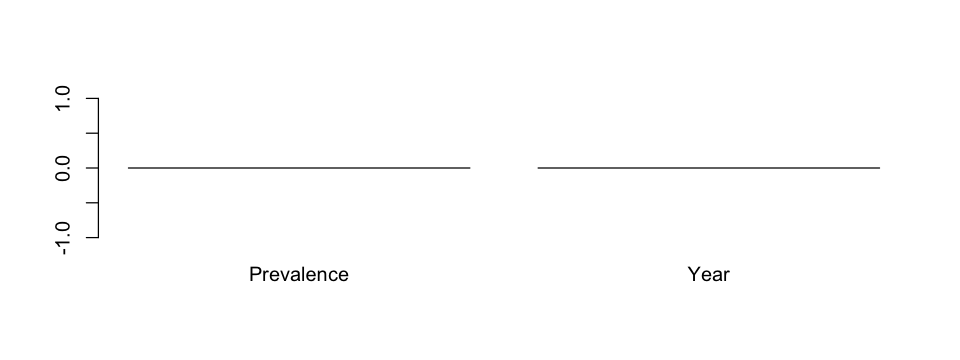

In [7]:
# Check whether each columns got missing value:
lapply(ASD_State_4_PLR, function(col_x)sum(is.na(col_x)))
       
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=3)
barplot(apply(ASD_State_4_PLR, 2, function(col_x)sum(is.na(col_x))))

**No missing values**

---

**PLR Workshop Task: <span style="color:blue">3. c.	Visualize the data to gain insights</span>**

In [170]:
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=4)

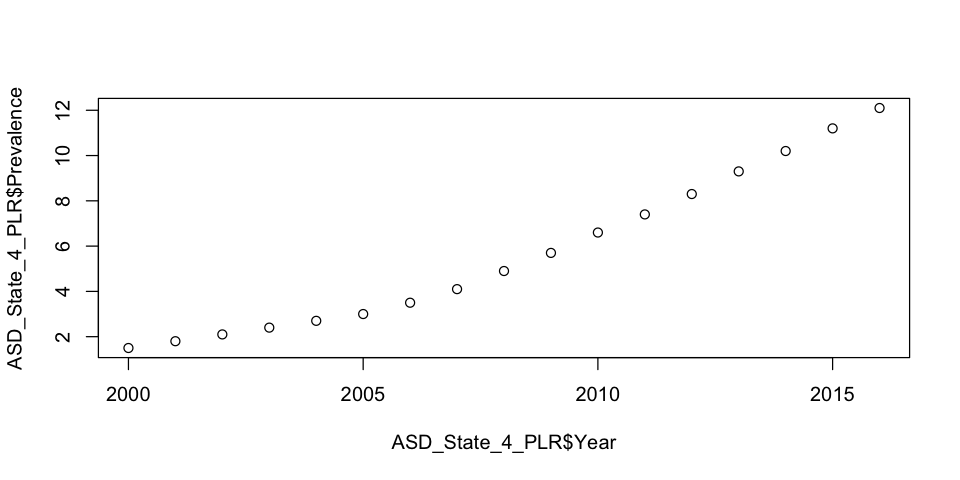

In [171]:
plot(ASD_State_4_PLR$Year, ASD_State_4_PLR$Prevalence)

---

**PLR Workshop Task: <span style="color:blue">4. d.	Compute correlation between variables and apply multiple regression.</span>**

Recode categorical variable to dummy (numeric) variable using one-hot encoding:

In [172]:
# To use select_if() function
if(!require(dplyr)){install.packages("dplyr")}
library("dplyr")

summary(select_if(ASD_State_4_PLR, is.numeric))

   Prevalence          Year     
 Min.   : 1.500   Min.   :2000  
 1st Qu.: 2.700   1st Qu.:2004  
 Median : 4.900   Median :2008  
 Mean   : 5.694   Mean   :2008  
 3rd Qu.: 8.300   3rd Qu.:2012  
 Max.   :12.100   Max.   :2016  

In [173]:
correlation = cor(select_if(ASD_State_4_PLR, is.numeric))
correlation

,Prevalence,Year
Prevalence,1.000000,0.980119
Year,0.980119,1.000000


In [174]:
# Variable's correlation against target dependent variable:
correlation[, 1]

Prevalence       Year 
  1.000000   0.980119

In [175]:
str(ASD_State_4_PLR)

'data.frame':	17 obs. of  2 variables:
 $ Prevalence: num  1.5 1.8 2.1 2.4 2.7 3 3.5 4.1 4.9 5.7 ...
 $ Year      : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...


In [176]:
# SLR
fit_model_SLR = lm(Prevalence ~ Year , data = ASD_State_4_PLR)
#
summary(fit_model_SLR)


Call:
lm(formula = Prevalence ~ Year, data = ASD_State_4_PLR)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9150 -0.6566 -0.1108  0.4809  1.2392 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1358.0726    71.2824  -19.05 6.37e-12 ***
Year            0.6792     0.0355   19.13 6.00e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.717 on 15 degrees of freedom
Multiple R-squared:  0.9606,	Adjusted R-squared:  0.958 
F-statistic:   366 on 1 and 15 DF,  p-value: 5.995e-12


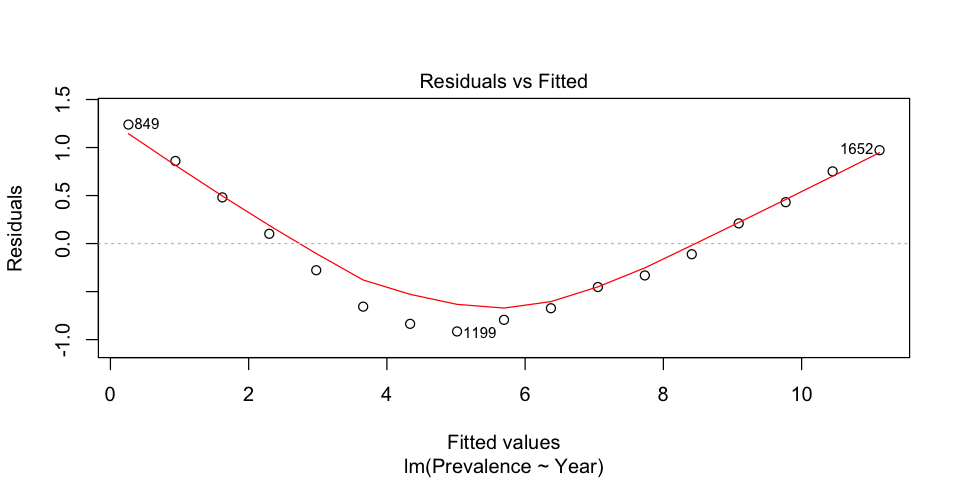

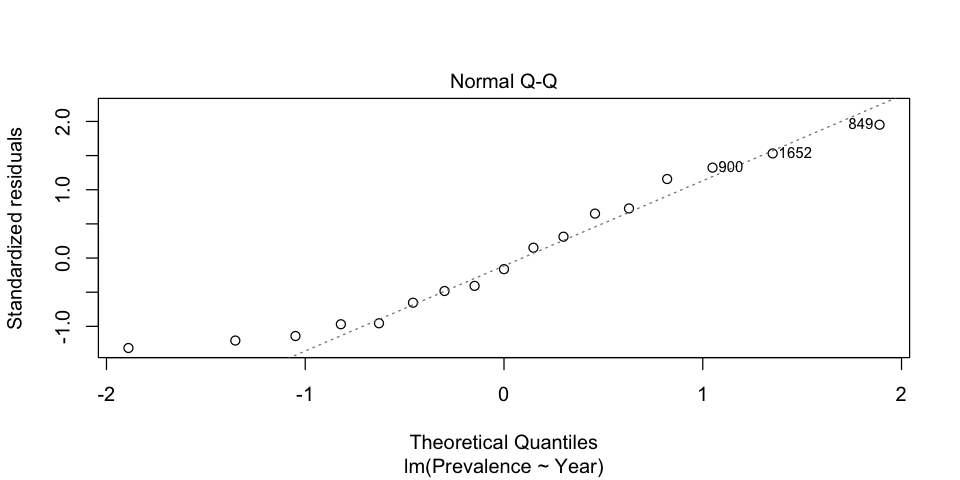

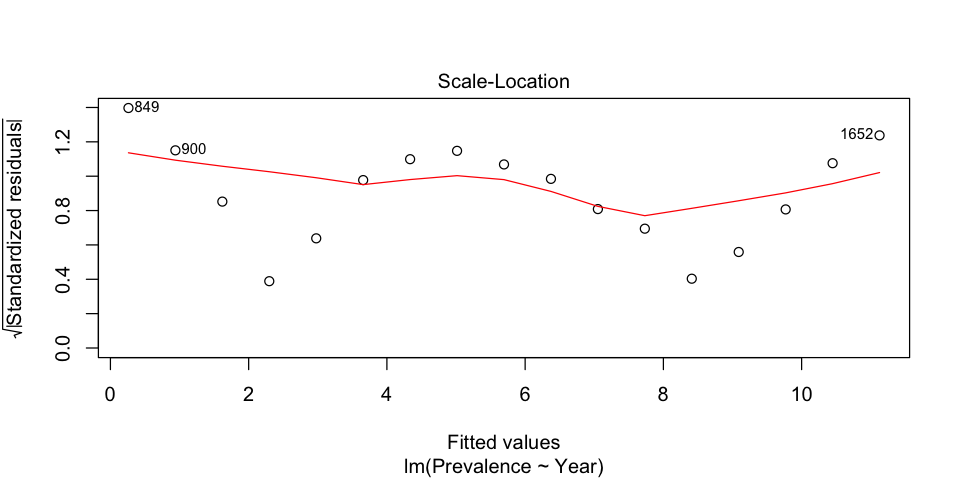

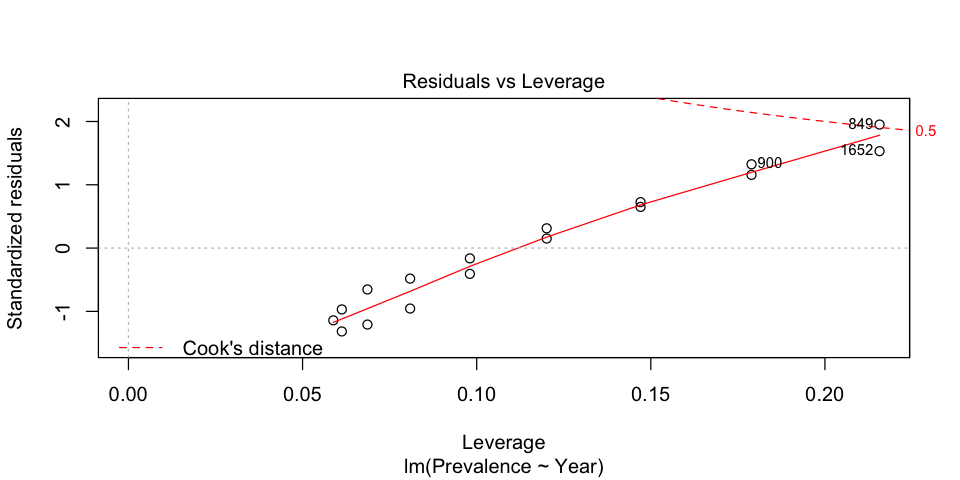

In [177]:
plot(fit_model_SLR)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.958
    </p>
</div>


In [178]:
# PLR (quadratic)
fit_model_PLR = lm(Prevalence ~ Year + I(Year^2), data = ASD_State_4_PLR)
#
summary(fit_model_PLR)


Call:
lm(formula = Prevalence ~ Year + I(Year^2), data = ASD_State_4_PLR)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26223 -0.05325  0.03671  0.11045  0.17918 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.231e+05  6.980e+03   17.64 5.87e-11 ***
Year        -1.233e+02  6.953e+00  -17.73 5.45e-11 ***
I(Year^2)    3.087e-02  1.731e-03   17.83 5.07e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1524 on 14 degrees of freedom
Multiple R-squared:  0.9983,	Adjusted R-squared:  0.9981 
F-statistic:  4209 on 2 and 14 DF,  p-value: < 2.2e-16


**Abount I() function:** https://stackoverflow.com/questions/8055508/in-r-formulas-why-do-i-have-to-use-the-i-function-on-power-terms-like-y-i


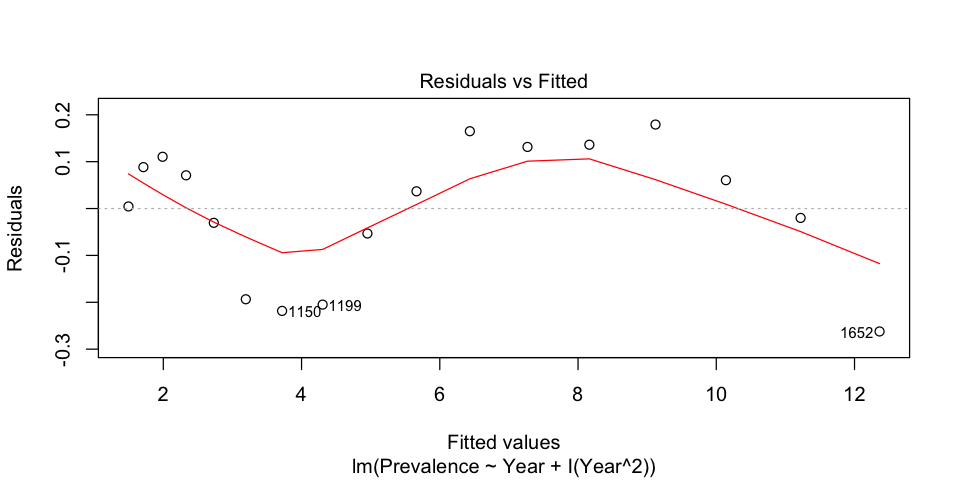

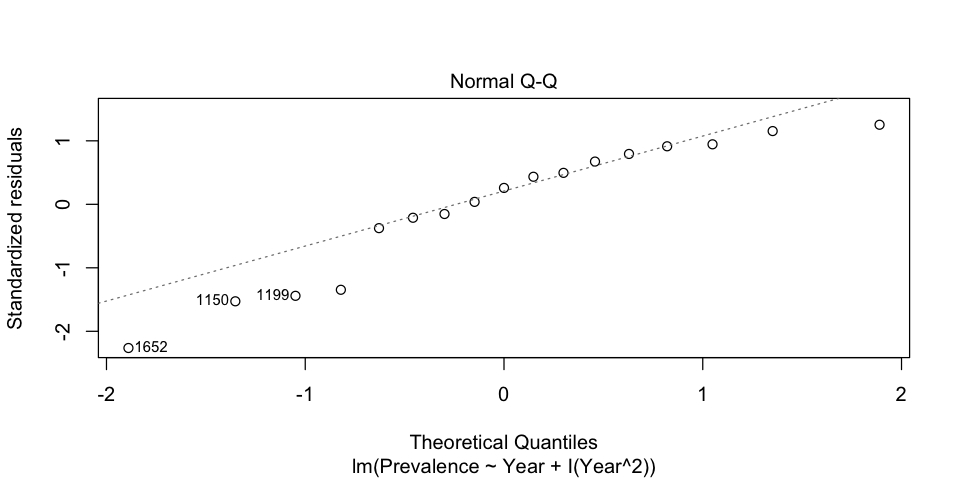

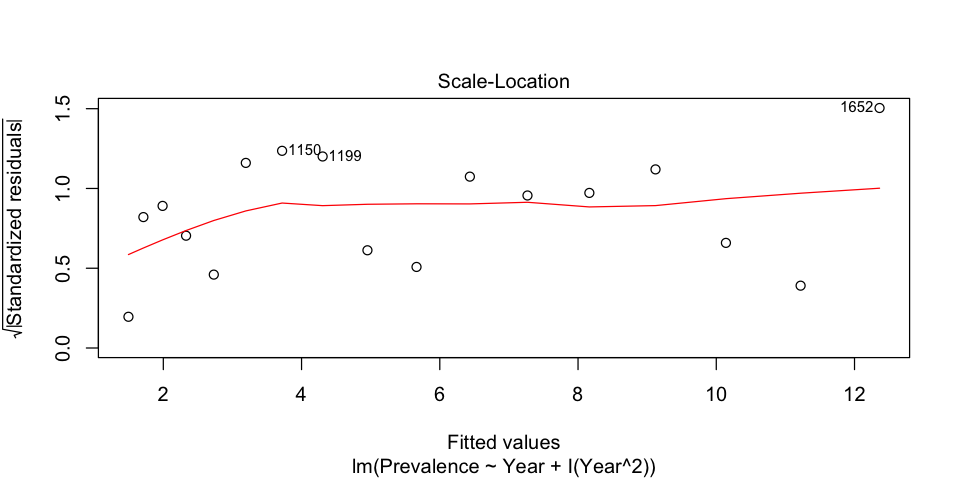

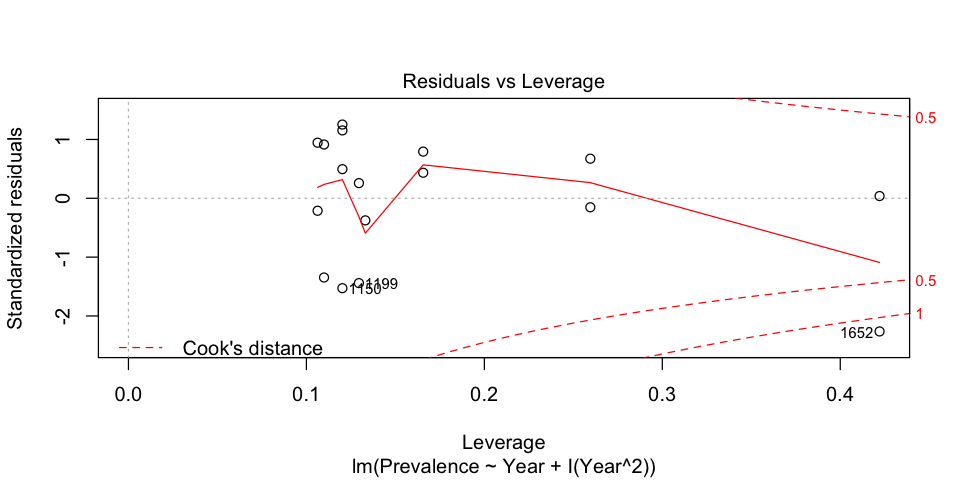

In [179]:
plot(fit_model_PLR)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.9981
    </p>
</div>


**Visualise the difference between SLR & PLR:**

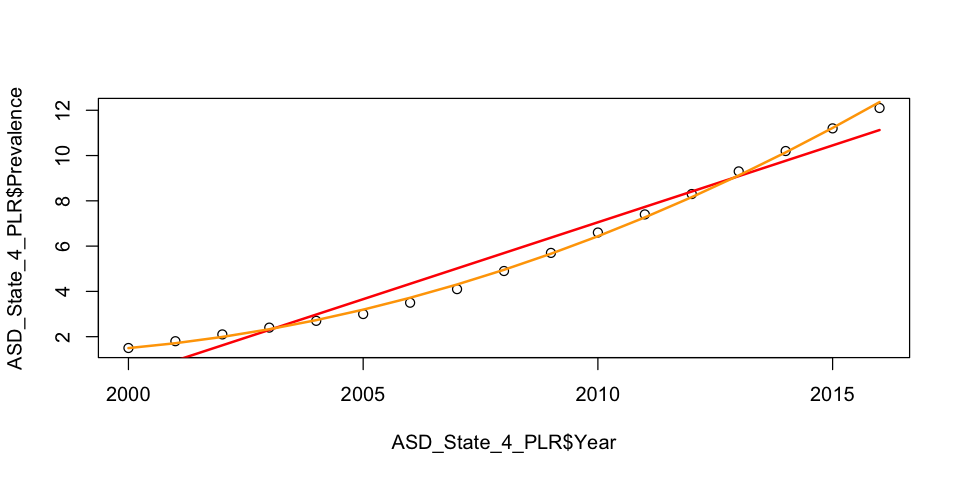

In [180]:
plot(ASD_State_4_PLR$Year, ASD_State_4_PLR$Prevalence)
# add SLR line
lines(ASD_State_4_PLR$Year, predict(fit_model_SLR, ASD_State_4_PLR), col="red", lwd=2) # or # abline(fit_model_SLR, col="red", lwd=2)
# add PLR line
lines(ASD_State_4_PLR$Year, predict(fit_model_PLR, ASD_State_4_PLR), col="orange", lwd=2) 

---

**PLR Prediciton**


In [181]:
newdata = ASD_State_4_PLR[1,] # Copy datastructure
newdata$Prevalence = NA
newdata$Year = 2025

newdata

,Prevalence,Year
849,NA,2025


In [182]:
predict(fit_model_PLR, newdata, interval = "predict")
#
cat("Predicted ASD Prevalence of Year [", newdata$Year, "] is", round(predict(fit_model_PLR, newdata), 1), "per 1,000 Children")


,fit,lwr,upr
849,25.42036,24.34469,26.49602


Predicted ASD Prevalence of Year [ 2025 ] is 25.4 per 1,000 Children

---

**Multiple PLR Workshop Task: <span style="color:blue">5. e.	Multiple polynomial regression (MPR).</span>** (Enhance MLR by adding higher order transformed variables.)

**Resuse MLR data: <span style="color:blue">ASD_State_4_MLR</span>** Cop to new dataframe: ASD_State_4_MPR

In [183]:
ASD_State_4_MPR = ASD_State_4_MLR

dim(ASD_State_4_MPR)


[1] 1692    5

In [184]:
summary(ASD_State_4_MPR)

  Denominator        Prevalence          Year       Source   
 Min.   :    965   Min.   : 0.400   Min.   :2000   addm: 86  
 1st Qu.: 107151   1st Qu.: 3.100   1st Qu.:2003   medi:655  
 Median : 353328   Median : 5.600   Median :2007   nsch: 98  
 Mean   : 604689   Mean   : 7.191   Mean   :2007   sped:853  
 3rd Qu.: 767928   3rd Qu.: 9.200   3rd Qu.:2011             
 Max.   :5824922   Max.   :42.700   Max.   :2016             
                                                             
            State_Full2  
 AZ-Arizona       :  40  
 MD-Maryland      :  40  
 GA-Georgia       :  39  
 MO-Missouri      :  39  
 NC-North Carolina:  39  
 WI-Wisconsin     :  39  
 (Other)          :1456  

$Denominator
[1] 0

$Prevalence
[1] 0

$Year
[1] 0

$Source
[1] 0

$State_Full2
[1] 0

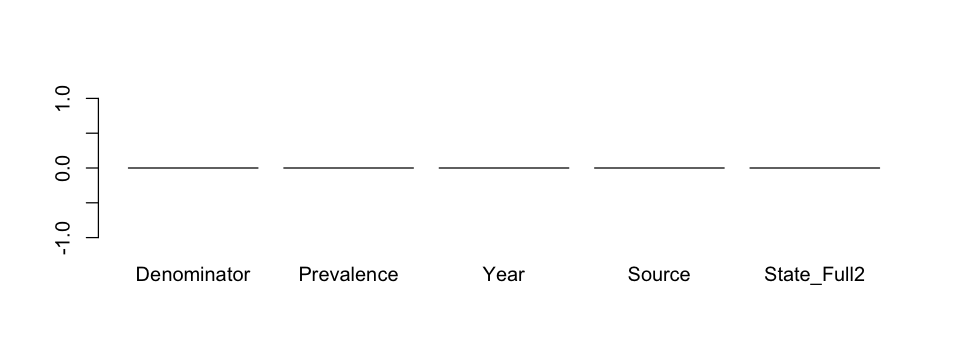

In [185]:
# Check whether each columns got missing value:
lapply(ASD_State_4_MLR, function(col_x)sum(is.na(col_x)))
       
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=3)
barplot(apply(ASD_State_4_MLR, 2, function(col_x)sum(is.na(col_x))))

**Build Multiple PLR model: + I(Year^2) + I(log(Denominator)**

In [186]:
fit_model_MPR = lm(Prevalence ~ . + I(Year^2) + I(log(Denominator)), data = ASD_State_4_MPR) # "~." means all other variables, including factors
#
summary(fit_model_MPR)


Call:
lm(formula = Prevalence ~ . + I(Year^2) + I(log(Denominator)), 
    data = ASD_State_4_MPR)

Residuals:
   Min     1Q Median     3Q    Max 
-9.697 -1.238  0.007  1.157 19.672 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         7.908e+04  1.309e+04   6.044 1.86e-09 ***
Denominator                         2.074e-06  2.340e-07   8.863  < 2e-16 ***
Year                               -7.943e+01  1.304e+01  -6.093 1.38e-09 ***
Sourcemedi                          8.189e-01  6.860e-01   1.194 0.232812    
Sourcensch                          8.667e-02  7.138e-01   0.121 0.903371    
Sourcesped                          2.740e-01  8.268e-01   0.331 0.740399    
State_Full2AL-Alabama               4.765e+00  7.495e-01   6.357 2.66e-10 ***
State_Full2AR-Arkansas              1.978e+00  7.178e-01   2.755 0.005930 ** 
State_Full2AZ-Arizona               4.043e+00  7.703e-01   5.248 1.74e-07 ***
State_Full2CA-Californ

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.7884
    </p>
</div>


**Mutiple PLR Prediciton**

In [187]:
# Copy datastructure
newdata = subset(ASD_State_4_MPR, ASD_State_4_MPR$Year == 2016 &
                            ASD_State_4_MPR$State_Full2 == 'FL-Florida' & 
                            ASD_State_4_MPR$Source == 'sped')
newdata

,Denominator,Prevalence,Year,Source,State_Full2
1652,2555399,12.1,2016,sped,FL-Florida


In [188]:
newdata = ASD_State_4_MPR[1,] # Copy datastructure
newdata$Prevalence = NA
newdata$Denominator = 2600000
newdata$Year = 2025
newdata$Source = "sped"
newdata$State_Full2 = "FL-Florida"

newdata

Denominator,Prevalence,Year,Source,State_Full2
2600000,NA,2025,sped,FL-Florida


In [189]:
predict(fit_model_MPR, newdata, interval = "predict")
#
cat("Predicted ASD Prevalence of Year [", newdata$Year, "] is", round(predict(fit_model_MPR,newdata), 1), "per 1,000 Children")


fit,lwr,upr
22.70557,17.01847,28.39267


Predicted ASD Prevalence of Year [ 2025 ] is 22.7 per 1,000 Children

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h3>
        Quiz:
    </h3>
    <p>
        Compare predicted ASD prevalence and model $R^2$ between: Multiple Linear Rregression and Multiple Polynomial Rregression.
    </p>
    <p>
        Which prediction result would you use? Provide yor justifications.
    </p>
</div>

In [190]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# Write your code below and press Shift+Enter to execute 
# TBD

-->

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Linear Model: Logistic Regression (LR)</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Linear Model: Logistic Regression (LR) - Workshop Task
    </h3>
</div>


**Workshop Task:**

1. a.	Get the data.

2. b.	Logistic regression - Binary Class.

3. c.	Logistic regression - Multi-Class.


**LR Workshop Task: <span style="color:blue">1. a. Get the data.</span>**

**Use Case Data: <span style="color:blue">"../dataset/ADV_ASD_State_R.csv"</span>**

**Read in CSV data, storing as R <span style="color:blue">dataframe</span>**

In [191]:
# Read back in above saved file:
# ASD_State <- read.csv("../dataset/ADV_ASD_State_R.csv")
# ASD_State$Year_Factor <- factor(ASD_State$Year_Factor, ordered = TRUE) # Convert Year_Factor to ordered.factor
# ASD_State$Prevalence_Risk2 = factor(ASD_State$Prevalence_Risk2, ordered=TRUE, levels=c("Low", "High"))
# ASD_State$Prevalence_Risk4 = factor(ASD_State$Prevalence_Risk4, ordered=TRUE, levels=c("Low", "Medium", "High", "Very High"))


In [192]:
head(ASD_State)

State,Denominator,Prevalence,Lower.CI,Upper.CI,Year,Source,Source_Full1,State_Full1,State_Full2,...,Hispanic.Lower.CI,Hispanic.Upper.CI,Asian.or.Pacific.Islander.Prevalence,Asian.or.Pacific.Islander.Lower.CI,Asian.or.Pacific.Islander.Upper.CI,Source_UC,Source_Full3,Prevalence_Risk2,Prevalence_Risk4,Year_Factor
AZ,45322,6.5,5.8,7.3,2000,addm,Autism & Developmental Disabilities Monitoring Network,Arizona,AZ-Arizona,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
GA,43593,6.5,5.8,7.3,2000,addm,Autism & Developmental Disabilities Monitoring Network,Georgia,GA-Georgia,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
MD,21532,5.5,4.6,6.6,2000,addm,Autism & Developmental Disabilities Monitoring Network,Maryland,MD-Maryland,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
NJ,29714,9.9,8.9,11.1,2000,addm,Autism & Developmental Disabilities Monitoring Network,New Jersey,NJ-New Jersey,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
SC,24535,6.3,5.4,7.4,2000,addm,Autism & Developmental Disabilities Monitoring Network,South Carolina,SC-South Carolina,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,High,Medium,2000
WV,23065,4.5,3.7,5.5,2000,addm,Autism & Developmental Disabilities Monitoring Network,West Virginia,WV-West Virginia,...,NA,NA,NA,NA,NA,ADDM,ADDM Autism & Developmental Disabilities Monitoring Network,Low,Low,2000


In [193]:
Column_Names = c("Prevalence_Risk2", "Denominator", "Year", "Source", "State_Full2")
ASD_State_4_LR_Risk2 <- ASD_State[ , (names(ASD_State) %in% Column_Names)]
dim(ASD_State_4_LR_Risk2)
ASD_State_4_LR_Risk2

[1] 1692    5

Denominator,Year,Source,State_Full2,Prevalence_Risk2
45322,2000,addm,AZ-Arizona,High
43593,2000,addm,GA-Georgia,High
21532,2000,addm,MD-Maryland,High
29714,2000,addm,NJ-New Jersey,High
24535,2000,addm,SC-South Carolina,High
23065,2000,addm,WV-West Virginia,Low
35472,2002,addm,AL-Alabama,Low
45113,2002,addm,AZ-Arizona,High
36472,2002,addm,AR-Arkansas,High
11020,2002,addm,CO-Colorado,High


In [194]:
Column_Names = c("Prevalence_Risk4", "Denominator", "Year", "Source", "State_Full2")
ASD_State_4_LR_Risk4 <- ASD_State[ , (names(ASD_State) %in% Column_Names)]
dim(ASD_State_4_LR_Risk4)
ASD_State_4_LR_Risk4

[1] 1692    5

Denominator,Year,Source,State_Full2,Prevalence_Risk4
45322,2000,addm,AZ-Arizona,Medium
43593,2000,addm,GA-Georgia,Medium
21532,2000,addm,MD-Maryland,Medium
29714,2000,addm,NJ-New Jersey,Medium
24535,2000,addm,SC-South Carolina,Medium
23065,2000,addm,WV-West Virginia,Low
35472,2002,addm,AL-Alabama,Low
45113,2002,addm,AZ-Arizona,Medium
36472,2002,addm,AR-Arkansas,Medium
11020,2002,addm,CO-Colorado,Medium


---

**LR Workshop Task: <span style="color:blue">2. b.	Logistic regression (LR) Binary Class.</span>** (Reuse Multiple Polynomial Model on categorical dependent variable.)


 Low High 
 740  952 

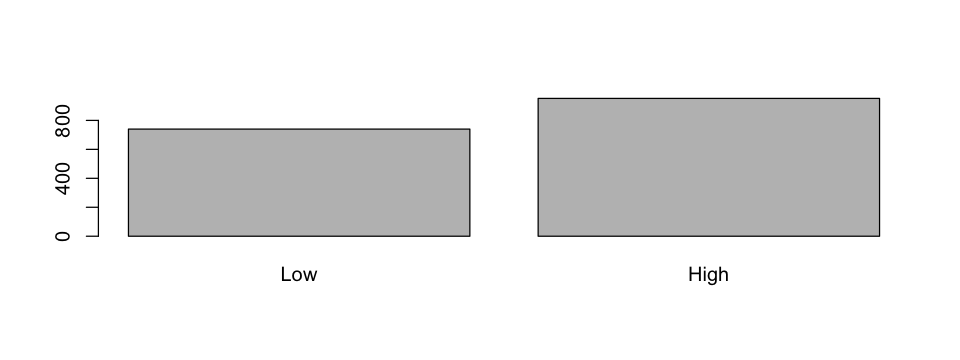

In [195]:
table(ASD_State_4_LR_Risk2$Prevalence_Risk2)
barplot(table(ASD_State_4_LR_Risk2$Prevalence_Risk2))

      
       addm medi nsch sped
  Low     5  344    0  391
  High   81  311   98  462

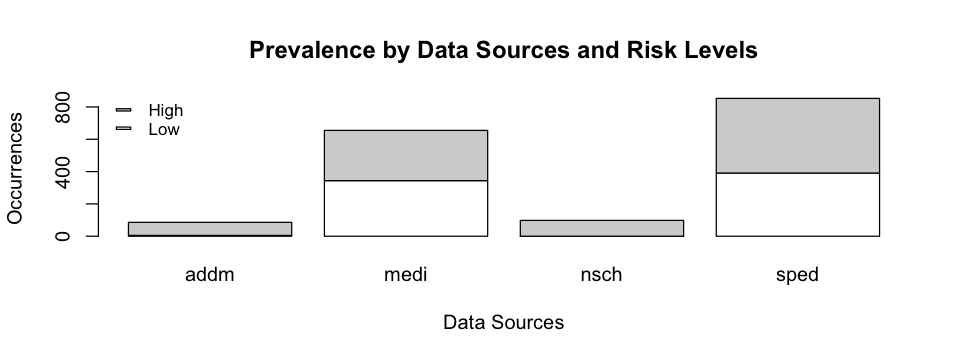

In [196]:
counts = table(ASD_State_4_LR_Risk2$Prevalence_Risk2, ASD_State_4_LR_Risk2$Source)
counts
barplot(counts,
        main="Prevalence by Data Sources and Risk Levels",
        xlab="Data Sources",
        ylab="Occurrences",
        col=c("white", "lightgrey"),
        legend = rownames(counts), 
        args.legend = list(x = "topleft", bty = "n", cex = 0.85, y.intersp = 4))


In [197]:
str(ASD_State_4_LR_Risk2)

'data.frame':	1692 obs. of  5 variables:
 $ Denominator     : int  45322 43593 21532 29714 24535 23065 35472 45113 36472 11020 ...
 $ Year            : int  2000 2000 2000 2000 2000 2000 2002 2002 2002 2002 ...
 $ Source          : Factor w/ 4 levels "addm","medi",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ State_Full2     : Factor w/ 51 levels "AK-Alaska","AL-Alabama",..: 4 11 21 32 41 50 2 4 3 6 ...
 $ Prevalence_Risk2: Ord.factor w/ 2 levels "Low"<"High": 2 2 2 2 2 1 1 2 2 2 ...


**Build model**

In [198]:
# Binary Classification:
fit_model_LR_Risk2 = glm(Prevalence_Risk2 ~ Denominator + Year + Source + State_Full2 + I(Year^2) + I(log(Denominator)), 
                         family=binomial(link='logit'), data = ASD_State_4_LR_Risk2)
#
summary(fit_model_LR_Risk2)


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = Prevalence_Risk2 ~ Denominator + Year + Source + 
    State_Full2 + I(Year^2) + I(log(Denominator)), family = binomial(link = "logit"), 
    data = ASD_State_4_LR_Risk2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1715  -0.2765   0.0036   0.2843   2.9153  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         3.555e+04  2.844e+04   1.250 0.211249    
Denominator                         3.855e-06  5.131e-07   7.514 5.75e-14 ***
Year                               -3.614e+01  2.834e+01  -1.275 0.202284    
Sourcemedi                          1.381e+00  1.290e+00   1.071 0.284340    
Sourcensch                          6.822e+00  4.151e+02   0.016 0.986887    
Sourcesped                          1.242e+00  1.610e+00   0.771 0.440412    
State_Full2AL-Alabama               2.623e+00  1.182e+00   2.219 0.026454 *  
State_Full2AR-Arkansas              3.721e+00  1.108e+00

**Evaluate model**

In [199]:
# Likelihood ratio test: significance of the difference between the full model and the null model.
pchisq(fit_model_LR_Risk2$null.deviance - fit_model_LR_Risk2$deviance, 
       fit_model_LR_Risk2$df.null - fit_model_LR_Risk2$df.residual, lower.tail = FALSE)


[1] 1.533547e-271

**Check whether above value is very small (the smaller the more significant), e.g. < 0.05.**

< How to perform a Logistic Regression in R > Michy Alice

https://www.r-bloggers.com/how-to-perform-a-logistic-regression-in-r/


In [200]:
# null deviance and the residual deviance
anova(fit_model_LR_Risk2, test="Chisq")

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,1691,2318.9775,NA
Denominator,1,3.537393,1690,2315.4401,5.999971e-02
Year,1,799.973390,1689,1515.4667,5.468229e-176
Source,3,130.380991,1686,1385.0857,4.476806e-28
State_Full2,50,503.146385,1636,881.9393,4.071306e-76
I(Year^2),1,3.124751,1635,878.8146,7.711166e-02
I(log(Denominator)),1,37.914698,1634,840.8999,7.390635e-10


In [201]:
# R^2 equivalent
if(!require(pscl)){install.packages("pscl")}
library("pscl")

While no exact equivalent to the $R^2$ of linear regression exists, the **McFadden $R^2$** index can be used to assess the model fit.

In [202]:
# R^2 equivalent
pR2(fit_model_LR_Risk2)[4]

McFadden 
0.6373833

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        McFadden $R^2$ = 0.6374
    </p>
</div>


---

**LR Workshop Task: <span style="color:blue">3. c.	Logistic regression (LR) Muti-Class.</span>** (Reuse Multiple Polynomial Model on categorical dependent variable.)


      Low    Medium      High Very High 
      740       584       294        74 

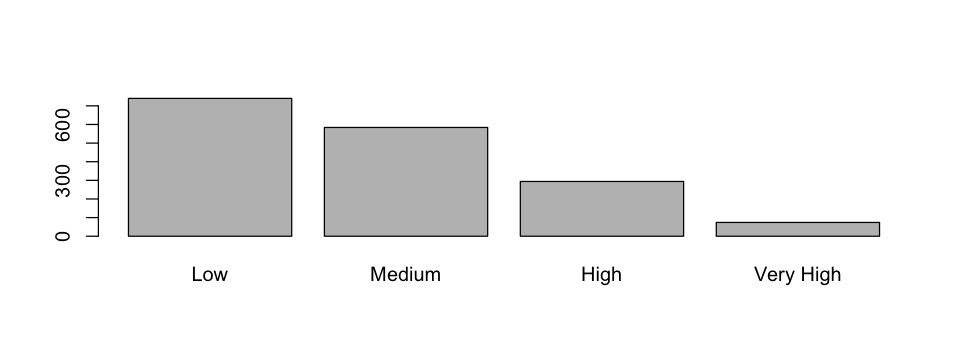

In [205]:
table(ASD_State_4_LR_Risk4$Prevalence_Risk4)
barplot(table(ASD_State_4_LR_Risk4$Prevalence_Risk4))

           
            addm medi nsch sped
  Low          5  344    0  391
  Medium      36  225    5  318
  High        38   74   38  144
  Very High    7   12   55    0

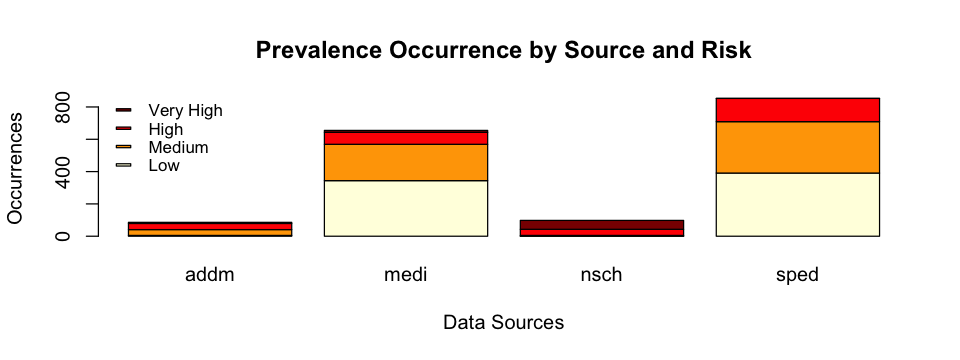

In [206]:
counts = table(ASD_State_4_LR_Risk4$Prevalence_Risk4, ASD_State_4_LR_Risk4$Source)
counts
barplot(counts,
        main="Prevalence Occurrence by Source and Risk",
        xlab="Data Sources",
        ylab="Occurrences",
        col=c("lightyellow", "orange", "red","darkred"),
        legend = rownames(counts), 
        args.legend = list(x = "topleft", bty = "n", cex = 0.85, y.intersp = 4))


**Build model**

In [207]:
# multinom function from the nnet package 
if(!require(nnet)){install.packages("nnet")}
library("nnet")

In [208]:
# Multi-Class Classification:
fit_model_LR_Risk4 = multinom(Prevalence_Risk4 ~ Denominator + Year + Source + State_Full2 + I(Year^2) + I(log(Denominator)), 
                     data = ASD_State_4_LR_Risk4, maxit=1000) # maxit https://cran.r-project.org/web/packages/nnet/nnet.pdf

summary(fit_model_LR_Risk4)


# weights:  236 (174 variable)
initial  value 2345.610059 
iter  10 value 1642.176333
iter  20 value 1287.779159
iter  30 value 1107.445163
iter  40 value 912.571666
iter  50 value 882.138178
iter  60 value 839.576845
iter  70 value 828.921336
iter  80 value 827.366199
iter  80 value 827.366199
iter  90 value 823.788373
iter 100 value 817.330788
iter 110 value 815.132978
iter 120 value 806.982029
iter 130 value 805.485361
iter 140 value 782.945027
iter 150 value 770.164703
iter 160 value 769.151514
iter 170 value 768.712774
iter 180 value 768.319246
iter 190 value 767.865362
iter 200 value 767.692544
iter 210 value 767.608903
iter 220 value 767.590479
iter 230 value 767.587186
iter 240 value 767.584337
iter 250 value 767.583612
iter 260 value 767.583308
iter 270 value 767.582953
final  value 767.582938 
converged


Call:
multinom(formula = Prevalence_Risk4 ~ Denominator + Year + Source + 
    State_Full2 + I(Year^2) + I(log(Denominator)), data = ASD_State_4_LR_Risk4, 
    maxit = 1000)

Coefficients:
          (Intercept)  Denominator      Year Sourcemedi Sourcensch Sourcesped
Medium     0.09425650 3.689939e-06 -0.679239   1.276502  2.3742246  1.2422937
High      -0.03042145 7.066271e-06 -1.303052   0.590950 -0.2502273 -0.9522185
Very High -0.01042782 2.560592e-06 -1.832343   8.625024 -3.3378601 -8.1000998
          State_Full2AL-Alabama State_Full2AR-Arkansas State_Full2AZ-Arizona
Medium                 2.472394               3.693585              4.033990
High                   5.724332               3.334605              6.721532
Very High             13.069590               1.472838              5.024761
          State_Full2CA-California State_Full2CO-Colorado
Medium                   -7.328597              0.7904175
High                    -15.889171              0.5179641
Very High        

< MULTINOMIAL LOGISTIC REGRESSION | R DATA ANALYSIS EXAMPLES >

https://stats.idre.ucla.edu/r/dae/multinomial-logistic-regression/

In [209]:
## extract the coefficients from the model and exponentiate
exp(coef(fit_model_LR_Risk4))
# Uncomment below to display all p values:
# paste(exp(coef(fit_model)))

,(Intercept),Denominator,Year,Sourcemedi,Sourcensch,Sourcesped,State_Full2AL-Alabama,State_Full2AR-Arkansas,State_Full2AZ-Arizona,State_Full2CA-California,...,State_Full2TX-Texas,State_Full2UT-Utah,State_Full2VA-Virginia,State_Full2VT-Vermont,State_Full2WA-Washington,State_Full2WI-Wisconsin,State_Full2WV-West Virginia,State_Full2WY-Wyoming,I(Year^2),I(log(Denominator))
Medium,1.0988416,1.000004,0.5070027,3.584080,10.74268022,3.4635486244,11.85078,40.188652,56.48587,6.564943e-04,...,1.184929e-02,3.309512,20.96169,6.743096,7.231255,863.9762,17.10398,2.081629e-01,1.000346,0.0536208647
High,0.9700366,1.000007,0.2717012,1.805703,0.77862374,0.3858839707,306.22878,28.067295,830.08783,1.257248e-07,...,1.218945e-06,3.446304,815.46090,300.392224,31.190459,9124.6208,227.71089,5.600658e-02,1.000661,0.0105485145
Very High,0.9896264,1.000003,0.1600381,5569.296511,0.03551287,0.0003035089,474297.56243,4.361596,152.13390,5.420253e-11,...,3.341495e-01,3.325384,196.88459,329.238394,81.245206,2226.3710,653.35794,4.772751e-06,1.000930,0.0006005445


In [210]:
# Test the significance/importance of each coefficient (check if p values < 0.05)

# z score for coefficients
z <- summary(fit_model_LR_Risk4)$coefficients/summary(fit_model_LR_Risk4)$standard.errors
cat('\n< Talbe of coefficient z scores>')
z

# p value of 2-tailed z test
p <- (1 - pnorm(abs(z), 0, 1)) * 2
cat('\n< Talbe of coefficient p values>')
p
# Uncomment below to display all p values:
# paste(p)


< Talbe of coefficient z scores>

,(Intercept),Denominator,Year,Sourcemedi,Sourcensch,Sourcesped,State_Full2AL-Alabama,State_Full2AR-Arkansas,State_Full2AZ-Arizona,State_Full2CA-California,...,State_Full2TX-Texas,State_Full2UT-Utah,State_Full2VA-Virginia,State_Full2VT-Vermont,State_Full2WA-Washington,State_Full2WI-Wisconsin,State_Full2WV-West Virginia,State_Full2WY-Wyoming,I(Year^2),I(log(Denominator))
Medium,1.380078e+13,33.692541,-50015059918,7.791048e+11,1.163901e+13,1.222608e+12,2.632565e+12,1.336971e+14,5.266149e+13,-1.992258e+14,...,-1.269092e+14,6.989833e+13,6.547560e+13,2.103574e+13,4.747448e+13,7.616558e+13,5.052087e+14,-1.808184e+14,12719.53,-1.276898e+12
High,-2.079191e+12,46.343625,-56270227321,1.604889e+11,-6.062653e+10,-1.338593e+12,6.407487e+12,4.500804e+13,1.178139e+14,-7.658342e+13,...,-2.082791e+14,5.962934e+12,6.224299e+13,4.815857e+13,2.355757e+13,1.082196e+14,5.741317e+13,-6.129107e+13,16445.03,-2.073328e+11
Very High,-6.204120e+11,1.279278,-52418226983,1.705706e+12,-7.706330e+11,-4.144674e+17,6.432646e+12,1.194057e+13,3.640614e+13,-2.357188e+19,...,-3.207454e+18,4.753021e+12,3.377694e+13,2.361114e+13,2.378222e+13,4.316103e+13,1.016853e+14,-1.691660e+17,12263.29,-2.797106e+11



< Talbe of coefficient p values>

,(Intercept),Denominator,Year,Sourcemedi,Sourcensch,Sourcesped,State_Full2AL-Alabama,State_Full2AR-Arkansas,State_Full2AZ-Arizona,State_Full2CA-California,...,State_Full2TX-Texas,State_Full2UT-Utah,State_Full2VA-Virginia,State_Full2VT-Vermont,State_Full2WA-Washington,State_Full2WI-Wisconsin,State_Full2WV-West Virginia,State_Full2WY-Wyoming,I(Year^2),I(log(Denominator))
Medium,0,0.0000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
High,0,0.0000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Very High,0,0.2007991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


While no exact equivalent to the $R^2$ of linear regression exists, the **McFadden $R^2$** index can be used to assess the model fit.

In [211]:
# R^2 equivalent
pR2(fit_model_LR_Risk4)[4]

fitting null model for pseudo-r2
# weights:  8 (3 variable)
initial  value 2345.610059 
iter  10 value 1979.347988
final  value 1979.347206 
converged


McFadden 
0.612204

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        McFadden $R^2$ = 0.6122
    </p>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Linear Model: Model Evaluation</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Linear Model: Linear Model: Model Evaluation - Workshop Task
    </h3>
</div>


**Workshop Task:**

1. a.	Train/Test Dataset Split
2. b.	Confusion Matrix & Accuracy for Classification
3. c.	K-Fold Cross Validation
4. d.	$R^2$ for Regression

**Model Evaluation Workshop Task: <span style="color:blue">1. a.	Train/Test Dataset Split</span>**

In [164]:
if(!require(caTools)){install.packages("caTools")}
library("caTools") 

In [165]:
# Generate a random number sequence that can be reproduced to check results thru the seed number.
set.seed(88)

# Stratified Random Sampling: split dataset into two sets in predefined proportion (SplitRatio)
# while preserving differnt class ratios of dependent variable. (e.g. Proportion of Low/High)
split <- sample.split(ASD_State_4_LR_Risk2$Prevalence_Risk2, SplitRatio = 0.7)

In [166]:
# Get training and test data
trainset <- subset(ASD_State_4_LR_Risk2, split == TRUE) 
testset <- subset(ASD_State_4_LR_Risk2, split == FALSE)

**Build a binary classification model to predict (categorical) Prevalence Risk Level using Logistic Regression (LR)**

In [167]:
# Binary Classification:
fit_model_LR_Risk2 = glm(Prevalence_Risk2 ~ Denominator + Year + Source + State_Full2 + I(Year^2) + I(log(Denominator)), 
                         family=binomial(link='logit'), data = trainset) # data = trainset

summary(fit_model_LR_Risk2)


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = Prevalence_Risk2 ~ Denominator + Year + Source + 
    State_Full2 + I(Year^2) + I(log(Denominator)), family = binomial(link = "logit"), 
    data = trainset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2887  -0.2840   0.0000   0.2573   2.9945  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         5.763e+04  3.538e+04   1.629 0.103311    
Denominator                         4.162e-06  6.157e-07   6.760 1.38e-11 ***
Year                               -5.815e+01  3.526e+01  -1.649 0.099171 .  
Sourcemedi                          1.118e+00  1.445e+00   0.774 0.439156    
Sourcensch                          1.054e+01  7.542e+02   0.014 0.988849    
Sourcesped                          7.207e-01  1.804e+00   0.399 0.689548    
State_Full2AL-Alabama               1.431e+00  1.343e+00   1.066 0.286634    
State_Full2AR-Arkansas              3.125e+00  1.264e+00   2.472 0.0

**Model Evaluation Workshop Task: <span style="color:blue">2. b.	Confusion Matrix & Accuracy for Classification</span>**

https://en.wikipedia.org/wiki/Confusion_matrix

In [168]:
# Confusion matrix on Trainset
probTrainset <- predict(fit_model_LR_Risk2, type = 'response')
# One way is to use the proportion of High risk in the *Training* data.
threshold2 <- sum(trainset$Prevalence_Risk2 == "High")/length(trainset$Prevalence_Risk2)
cat('Trainset High Risk Threshold = ', threshold2)
# If logistic regression probability > threshold, predict High, else predict Low.
predictTrainset <- ifelse(probTrainset > threshold2, "High", "Low")
# Create a contingency table (Confusion Matrix) with actuals on rows and predictions on columns.
table(trainset$Prevalence_Risk2, predictTrainset)

# Accuracy on Trainset
AccuracyTrain <- mean(predictTrainset == trainset$Prevalence_Risk2) 
cat('Trainset Accuracy = ', AccuracyTrain)
 


Trainset High Risk Threshold =  0.5625

      predictTrainset
       High Low
  Low    46 472
  High  593  73

Trainset Accuracy =  0.8994932

In [169]:
# Confusion matrix on Testset
probTestset <- predict(fit_model_LR_Risk2, newdata = testset, type = 'response') # newdata = testset
# One way is to use the proportion of High risk in the *Training* data.
cat('Reused Trainset High Risk Threshold = ', threshold2)
# If logistic regression probability > threshold, predict High, else predict Low.
predictTestset <- ifelse(probTestset > threshold2, "High", "Low")
# Create a contingency table (Confusion Matrix) with actuals on rows and predictions on columns.
table(testset$Prevalence_Risk2, predictTestset)

# Accuracy on Trainset
AccuracyTest <- mean(predictTestset == testset$Prevalence_Risk2) 
cat('Testset Accuracy = ', AccuracyTest)

Reused Trainset High Risk Threshold =  0.5625

      predictTestset
       High Low
  Low    30 192
  High  258  28

Testset Accuracy =  0.8858268

**Model Evaluation Workshop Task: <span style="color:blue">3. c.	K-Fold Cross Validation</span>**

### R caret package

The caret package (short for Classification And REgression Training) is a set of functions that attempt to streamline the process for creating predictive models. The package contains tools for:

* data splitting
* pre-processing
* feature selection
* model tuning using resampling
* variable importance estimation

http://topepo.github.io/caret/index.html


In [214]:
if(!require(caret)){install.packages("caret")}
library("caret")

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


In [219]:
if(!require(e1071)){install.packages("e1071")}
library("e1071")

Loading required package: e1071
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘e1071’”Warning message in install.packages("e1071"):
“installation of package ‘e1071’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library("e1071"): there is no package called ‘e1071’


In [ ]:
set.seed(88)
cv_control = trainControl(method = "cv", number = 5)

fit_model_LR_Risk2 = train(
  form = Prevalence_Risk2 ~ .,
  data = trainset,
  trControl = cv_control,
  method = "glm",
  family = "binomial"
)

**Model Evaluation Workshop Task: <span style="color:blue">4. d.	$R^2$ for Regression</span>**

**Build a regression model to predict (numeric) Prevalanece using Multiple Linear Regression (MLR)**

# dummy

<img src="../reference/CDC_ASD/ADV Years Data Available.png" align="left">


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h3>
        Quiz:
    </h3>
    <p>
        Obtain CI of Female.Prevalence propotion [ Source: ADDM] [ Year: 2014 ] at 99% confidence.
    </p>
    <p>
        Then Compare CI range with Male children's CI range. Which gender has statistically higer ASD prevalence/proportion?
    </p>
</div>

In [ ]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# Write your code below and press Shift+Enter to execute 
#
ASD_Female_numb
Children_Female_numb
ASD_Female_numb / Children_Female_numb
#
# ------------------------------------
# proportion test (with continuity correction) to obtain CI for Female.Prevalence propotion at 99% confidence:
# ------------------------------------
# Yates' chi-squared test = Wilson score interval with continuity correction - prop.test
prop.test(ASD_Female_numb, Children_Female_numb, conf.level = 0.99) 

# ------------------------------------
# Two group proportion test (with continuity correction)
# ------------------------------------
# Yates' chi-squared test = Wilson score interval with continuity correction - prop.test
prop.test(c(ASD_Male_numb, ASD_Female_numb), c(Children_Male_numb, Children_Female_numb), conf.level = 0.99) 

-->

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Workshop Submission</span>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h3>
        What to submit?
    </h3>
    <p>
        Choose one of below visualisations/charts, use R to construct the chart nicely.
    </p>
    <p>
        Optionally, enhance it with additional data dimensions to be better than original chart.
    </p>
</div>

https://www.cdc.gov/ncbddd/autism/data/index.html


<img src="../reference/CDC_ASD/ADV ASD Data Collection Locations (US States).png" width=600 align="center">



<img src="../reference/CDC_ASD/ADV [addm] [2014] 2014 ADDM NETWORK DATA.png" width=600 align="center">



<img src="../reference/CDC_ASD/ADV [addm] Prevalence Estimates by Race Ethnicity.png" width=600 align="center">



<img src="../reference/CDC_ASD/ADV [addm] [2012] Confidence Intervals by Data Set Location.png" width=600 align="center">


In [ ]:
# Write your code below and press Shift+Enter to execute 


<div class="alert alert-block alert-info" style="margin-top: 20px">
</div>


### Excellent! You have completed the workshop notebook!

**Connect with the author:**

This notebook was written by [GU Zhan (Sam)](https://sg.linkedin.com/in/zhan-gu-27a82823 "GU Zhan (Sam)").

[Sam](https://www.iss.nus.edu.sg/about-us/staff/detail/201/GU%20Zhan "GU Zhan (Sam)") is currently a lecturer in [Institute of Systems Science](https://www.iss.nus.edu.sg/ "NUS-ISS") in [National University of Singapore](http://www.nus.edu.sg/ "NUS"). He devotes himself into pedagogy & andragogy, and is very passionate in inspiring next generation of artificial intelligence lovers and leaders.


Copyright &copy; 2020 GU Zhan

This notebook and its source code are released under the terms of the [MIT License](https://en.wikipedia.org/wiki/MIT_License "Copyright (c) 2020 GU ZHAN").

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Appendices</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Interactive workshops: < Learning R inside R > using swirl() (in R/RStudio)
    </h3>
</div>


In [ ]:
# ----------------------------------
# Interactive workshops: < Learning R inside R > using swirl() (in R/RStudio)
# ----------------------------------

# https://github.com/telescopeuser/S-SB-Workshop

# Restart R to install to install "swirl" package:

# if(!require(swirl)){install.packages("swirl")}
# library("swirl")
# install_course("R Programming")
# install_course("Exploratory Data Analysis")
# install_course("Regression Models")
# install_course("Statistical Inference")
# swirl()

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="../reference/GZ_logo.png" width="60" align="right">
    </a>
</div>
